In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('Max_columns',None)
pd.set_option('Max_rows',None)

In [3]:
df=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')



In [4]:
df= df.dropna()

In [5]:
df.head()

Date  Year          Home Team  Home Team Ranking_x  Away Team  \
1 2021-11-27  2021                LSU                   99  Texas A&M   
2 2021-11-27  2021             Auburn                   99    Alabama   
3 2021-11-26  2021           Arkansas                   25   Missouri   
4 2021-11-25  2021  Mississippi State                   99   Ole Miss   
5 2021-11-20  2021     South Carolina                   99     Auburn   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
1                   15                 6.5                -6.5     27.0   
2                    3                19.5               -19.5     55.5   
3                   99               -14.5                14.5     63.0   
4                    9                -2.0                 2.0     65.0   
5                   99                 7.0                -7.0     45.5   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
1            27.0            24.0                      167.0   
2            22.0            24.0                      225.0   
3            34.0            17.0                      120.0   
4            21.0            31.0                      174.0   
5            21.0            17.0                      102.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
1                           33.4                           48.0   
2                           45.0                           55.0   
3                           24.0                           37.0   
4                           34.8                           54.0   
5                           20.4                           38.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
1                           19.0                       88.0   
2                           31.0                      118.0   
3                            6.0                       71.0   
4                           20.0                       72.0   
5                            3.0                       65.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
1                      29.333333                           35.0   
2                      39.333333                           49.0   
3                      23.666667                           37.0   
4                      24.000000                           31.0   
5                      21.666667                           38.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
1                           19.0             19.0   
2                           31.0             49.0   
3                            6.0              6.0   
4                           20.0             20.0   
5                            3.0              3.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
1                            1086.0                                 217.2   
2                            1550.0                                 310.0   
3                            1018.0                                 203.6   
4                            1396.0                                 279.2   
5                            1052.0                                 210.4   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
1                                 281.0                                 148.0   
2                                 385.0                                 208.0   
3                                 294.0                                  78.0   
4                                 412.0                                 213.0   
5                                 292.0                                 125.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
1                             666.0                            222.000000   
2                             957.0                            319.000000   
3                             590.0             

In [6]:
df.shape

(831, 1593)

In [7]:
df=df.dropna()

In [8]:
df.shape

(831, 1593)

In [9]:
df[['Home Team','Away Team','Year']].groupby(['Year','Home Team','Away Team']).count()

Empty DataFrame
Columns: []
Index: [(2005, Alabama, LSU), (2005, Alabama, Tennessee), (2005, Arkansas, Mississippi State), (2005, Arkansas, South Carolina), (2005, Auburn, Alabama), (2005, Auburn, Ole Miss), (2005, Auburn, South Carolina), (2005, Florida, Georgia), (2005, Florida, Mississippi State), (2005, Georgia, Auburn), (2005, Georgia, Kentucky), (2005, LSU, Arkansas), (2005, LSU, Auburn), (2005, LSU, Florida), (2005, Mississippi State, Alabama), (2005, Mississippi State, Ole Miss), (2005, Ole Miss, Arkansas), (2005, Ole Miss, LSU), (2005, South Carolina, Florida), (2005, Tennessee, South Carolina), (2005, Vanderbilt, Kentucky), (2006, Alabama, Auburn), (2006, Alabama, Mississippi State), (2006, Alabama, Ole Miss), (2006, Arkansas, Alabama), (2006, Arkansas, LSU), (2006, Arkansas, Ole Miss), (2006, Arkansas, Tennessee), (2006, Auburn, Arkansas), (2006, Auburn, Florida), (2006, Auburn, Georgia), (2006, Auburn, LSU), (2006, Florida, Alabama), (2006, Florida, Arkansas), (2006, Florida, Kentucky), (2006, Florida, LSU), (2006, Florida, South Carolina), (2006, Georgia, Mississippi State), (2006, Georgia, Tennessee), (2006, Georgia, Vanderbilt), (2006, Kentucky, Georgia), (2006, Kentucky, South Carolina), (2006, Kentucky, Vanderbilt), (2006, LSU, Alabama), (2006, LSU, Kentucky), (2006, LSU, Mississippi State), (2006, LSU, Ole Miss), (2006, Mississippi State, Arkansas), (2006, Mississippi State, Auburn), (2006, Mississippi State, Kentucky), (2006, Mississippi State, South Carolina), (2006, Ole Miss, Auburn), (2006, Ole Miss, Georgia), (2006, Ole Miss, Mississippi State), (2006, Ole Miss, Vanderbilt), (2006, South Carolina, Arkansas), (2006, South Carolina, Auburn), (2006, South Carolina, Georgia), (2006, South Carolina, Tennessee), (2006, Tennessee, Alabama), (2006, Tennessee, Florida), (2006, Tennessee, Kentucky), (2006, Tennessee, LSU), (2006, Vanderbilt, Arkansas), (2006, Vanderbilt, Florida), (2006, Vanderbilt, South Carolina), (2006, Vanderbilt, Tennessee), (2007, Alabama, Arkansas), (2007, Alabama, Georgia), (2007, Alabama, LSU), (2007, Arkansas, Auburn), (2007, Arkansas, Kentucky), (2007, Arkansas, Mississippi State), (2007, Arkansas, South Carolina), (2007, Auburn, Alabama), (2007, Auburn, Mississippi State), (2007, Auburn, Ole Miss), (2007, Auburn, Vanderbilt), (2007, Florida, Auburn), (2007, Florida, Georgia), (2007, Florida, Tennessee), (2007, Florida, Vanderbilt), (2007, Georgia, Auburn), (2007, Georgia, Kentucky), (2007, Georgia, Ole Miss), (2007, Georgia, South Carolina), (2007, Kentucky, Florida), (2007, Kentucky, LSU), (2007, Kentucky, Mississippi State), (2007, Kentucky, Tennessee), (2007, LSU, Arkansas), (2007, LSU, Auburn), (2007, LSU, Florida), (2007, LSU, South Carolina), (2007, LSU, Tennessee), (2007, Mississippi State, Alabama), (2007, Mississippi State, LSU), (2007, Mississippi State, Ole Miss), (2007, Mississippi State, Tennessee), (2007, Ole Miss, Alabama), ...]

# Percentiles example

In [10]:

percentiles = np.array([2.5,25,50,75,97.5])
a = np.percentile(df['Rolling 5 Past H&A Score_Home_Team'],percentiles)


print(a)

[ 52.75  99.   125.   153.   222.25]


In [11]:
b = np.percentile(df['Rolling 5 Past H&A Score Avg_Away_Team'],percentiles)


print(b)

[10.8 20.4 25.  30.5 43.6]


In [12]:
c = np.percentile(df['Past Home Score'],percentiles)


print(c)

[ 3.   17.   27.   37.   55.25]


In [13]:
c = np.percentile(df['Past Away Score'],percentiles)


print(c)

[ 0.   14.   23.   34.   52.25]


# Boxplot example

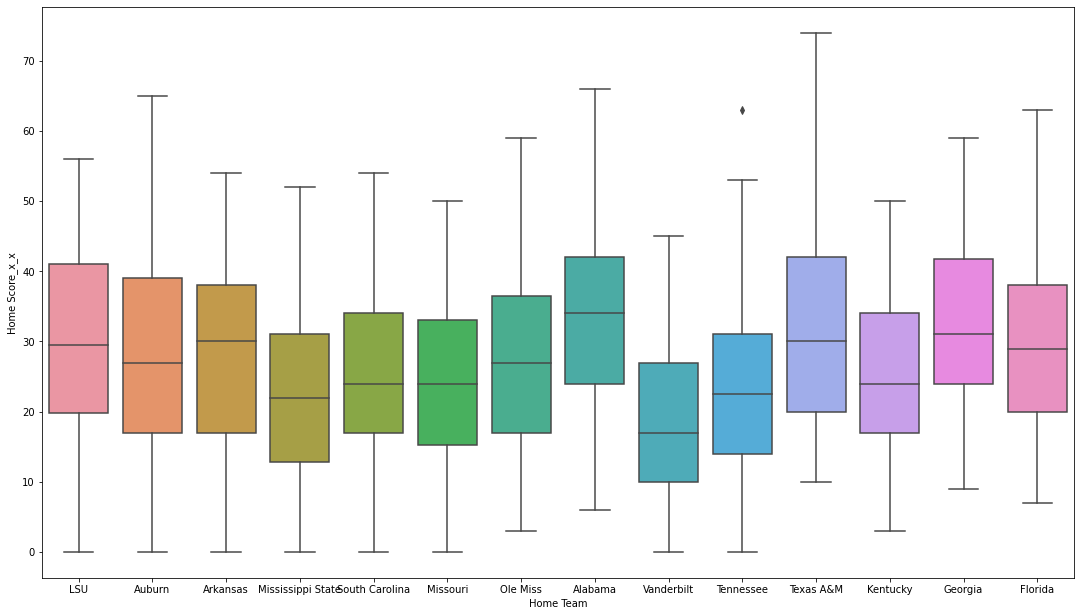

In [14]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='Home Team',y='Past Home Score',data=df)

# Label the axes

plt.xlabel('Home Team')
plt.ylabel('Home Score_x_x')

# Show the plot
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

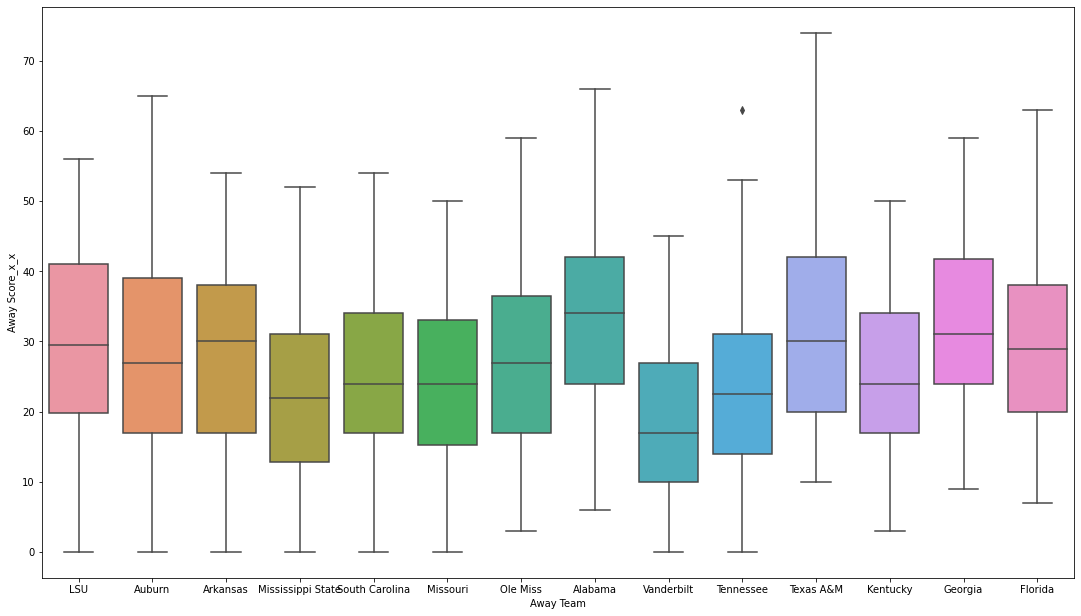

In [15]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='Home Team',y='Past Home Score',data=df)

# Label the axes

plt.xlabel('Away Team')
plt.ylabel('Away Score_x_x')

# Show the plot
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

In [16]:
df['Home Score_x_x'].mean()

27.269554753309265

In [17]:
df['Away Score_x_x'].mean()

24.0661853188929

(array([ 59., 109., 152., 161., 129., 123.,  62.,  29.,   6.,   1.]),
 array([ 0. ,  7.4, 14.8, 22.2, 29.6, 37. , 44.4, 51.8, 59.2, 66.6, 74. ]),
 <BarContainer object of 10 artists>)

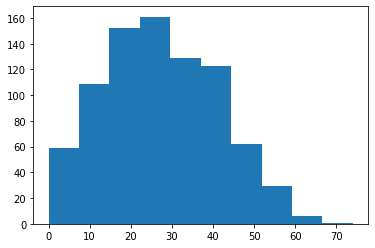

In [18]:
plt.hist(df['Home Score_x_x'])

(array([106., 139., 154., 153., 107.,  85.,  46.,  28.,  10.,   3.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

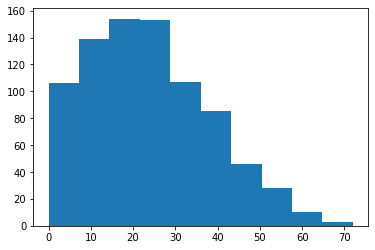

In [19]:
plt.hist(df['Away Score_x_x'])

In [20]:
H_wins=np.sum(df['Home Score_x_x'] > df['Away Score_x_x'])
H_wins

466

In [21]:
A_wins=np.sum(df['Away Score_x_x'] > df['Home Score_x_x'])
A_wins

365

In [22]:
Total_games=H_wins + A_wins

In [23]:
H_wins/Total_games

0.5607701564380265

In [24]:
A_wins/Total_games

0.43922984356197353

# Permutation test

In [25]:
stats.normaltest(df['Home Score_x_x'])

NormaltestResult(statistic=18.0403224574773, pvalue=0.00012094662459501215)

In [26]:
stats.normaltest(df['Away Score_x_x'])

NormaltestResult(statistic=33.93935286854339, pvalue=4.267398153035647e-08)

In [27]:
#We can conclude that the distributions are not normal as we have a pvalue less than .05 for both home and away score distributions

In [28]:
H_df=df
H_df['Score'] = df['Home Score_x_x']
H_df['Home_Away_df'] = 'Home_df'
H_df=H_df[['Score','Home_Away_df']]


In [29]:
A_df=df
A_df['Score']=df['Away Score_x_x']
A_df['Home_Away_df']= 'Away_df'
A_df=A_df[['Score','Home_Away_df']]

In [30]:
H_df.head()

,Score,Home_Away_df
1,27.0,Home_df
2,22.0,Home_df
3,34.0,Home_df
4,21.0,Home_df
5,21.0,Home_df


In [31]:
A_df.head()

,Score,Home_Away_df
1,24.0,Away_df
2,24.0,Away_df
3,17.0,Away_df
4,31.0,Away_df
5,17.0,Away_df


In [32]:
H_A_df= pd.concat([H_df,A_df])

In [33]:
H_A_df.sample(10)

,Score,Home_Away_df
304,16.0,Away_df
654,25.0,Home_df
647,6.0,Away_df
223,21.0,Home_df
494,42.0,Home_df
498,35.0,Home_df
718,29.0,Away_df
227,17.0,Home_df
43,62.0,Away_df
343,0.0,Home_df


In [34]:
H_A_df.shape

(1662, 2)

In [35]:
H_A_df['Permutation1'] = np.random.permutation(H_A_df['Score'])

In [36]:
H_A_df.groupby(by='Home_Away_df')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
Home_Away_df,,,,,,,,
Away_df,831.0,25.797834,13.793138,0.0,16.0,24.0,35.0,66.0
Home_df,831.0,25.537906,13.917596,0.0,14.0,24.0,35.0,74.0


In [37]:
H_A_df.groupby(by='Home_Away_df')['Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Home_Away_df,,,,,,,,
Away_df,831.0,24.066185,13.92516,0.0,14.0,23.0,34.0,72.0
Home_df,831.0,27.269555,13.59915,0.0,17.0,27.0,38.0,74.0


In [38]:
difference = list()

In [39]:
for i in range(10000):
    permutation = np.random.permutation(H_A_df['Score'])
    difference.append(np.mean(permutation[H_A_df['Home_Away_df']=='Home_df']) - np.mean(permutation[H_A_df['Home_Away_df']=='Away_df']))

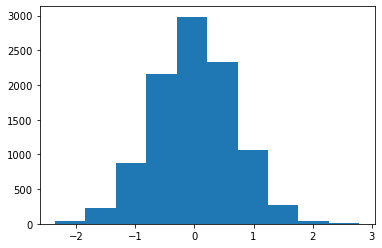

In [40]:
histo = plt.hist(difference)

In [41]:
obs_difference = np.mean(H_df['Score']) - np.mean(A_df['Score'])
obs_difference

3.2033694344163663

In [42]:
obs_difference = abs(obs_difference)

In [43]:
obs_difference

3.2033694344163663

In [44]:
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i] >= obs_difference):
        positiveExtremes.append(difference[i])
    elif (difference[i] <= -obs_difference):
        negativeExtremes.append(difference[i])

print(len(positiveExtremes))
print(len(negativeExtremes))

0
0


In [45]:
#After running the permutation test, we can conclude that indeed the home team does have an advantage over away team. 

In [46]:
Teams = df['Home Team'].unique()

In [47]:
Teams_list = []
for i in Teams:
    Teams_list.append(i)

In [48]:
Teams_list

['LSU',
 'Auburn',
 'Arkansas',
 'Mississippi State',
 'South Carolina',
 'Missouri',
 'Ole Miss',
 'Alabama',
 'Vanderbilt',
 'Tennessee',
 'Texas A&M',
 'Kentucky',
 'Georgia',
 'Florida']

In [49]:
var_holder ={}
for i in Teams_list:
    var_holder['H_' + i]= df[df['Home Team'] == i]
    var_holder['H_' + i]['Home_Away_df']= 'Home_df'
    var_holder['H_' + i]=var_holder['H_' + i][['Date','Year','Home Team','Home Team Ranking_x','Away Team','Away Team Ranking_x','Home Team Spread_x','Away Team Spread_x','Total_x','Home Score_x_x','Away Score_x_x','Home_Away_df']]
    var_holder['A_' + i] = df[df['Away Team'] == i]
    var_holder['A_' + i]['Home_Away_df']= 'Away_df'
    var_holder['A_' + i]=var_holder['A_' + i][['Date','Year','Home Team','Home Team Ranking_x','Away Team','Away Team Ranking_x','Home Team Spread_x','Away Team Spread_x','Total_x','Home Score_x_x','Away Score_x_x','Home_Away_df']]
locals().update(var_holder)
 


<ipython-input-49-ead992bb86eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_holder['H_' + i]['Home_Away_df']= 'Home_df'
<ipython-input-49-ead992bb86eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_holder['A_' + i]['Home_Away_df']= 'Away_df'


In [50]:
var_holder['H_Alabama']

,Date,Year,Home Team,Home Team Ranking_x,Away Team,Away Team Ranking_x,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Away Score_x_x,Home_Away_df
8,2021-11-20,2021,Alabama,1,Arkansas,21,-20.5,20.5,58.5,42.0,35.0,Home_df
15,2021-11-06,2021,Alabama,2,LSU,99,-29.0,29.0,67.0,20.0,14.0,Home_df
26,2021-10-23,2021,Alabama,4,Tennessee,99,-25.0,25.0,68.0,52.0,24.0,Home_df
41,2021-10-02,2021,Alabama,1,Ole Miss,12,-15.0,15.0,79.5,42.0,21.0,Home_df
67,2020-11-28,2020,Alabama,1,Auburn,22,-24.5,24.5,65.0,42.0,13.0,Home_df
76,2020-11-21,2020,Alabama,1,Kentucky,99,-31.5,31.5,57.5,63.0,3.0,Home_df
90,2020-10-31,2020,Alabama,2,Mississippi State,99,-29.0,29.0,63.5,41.0,0.0,Home_df
99,2020-10-17,2020,Alabama,2,Georgia,3,-6.0,6.0,57.0,41.0,24.0,Home_df
109,2020-10-03,2020,Alabama,2,Texas A&M,13,-18.0,18.0,54.0,52.0,24.0,Home_df
137,2019-11-09,2019,Alabama,3,LSU,2,-5.0,5.0,65.5,41.0,46.0,Home_df


In [51]:
a = var_holder['H_Alabama']['Away Score_x_x']

In [52]:
var_holder['H_Alabama']['Away Score_x_x'].describe()

count    64.000000
mean     14.812500
std      11.728239
min       0.000000
25%       6.750000
50%      13.500000
75%      21.250000
max      46.000000
Name: Away Score_x_x, dtype: float64

In [53]:
var_holder['A_Alabama']['Away Score_x_x'].describe()

count    66.000000
mean     34.227273
std      14.806231
min      10.000000
25%      22.250000
50%      31.000000
75%      47.750000
max      65.000000
Name: Away Score_x_x, dtype: float64

In [54]:
var_holder['A_Alabama']['Home Score_x_x'].describe()

count    66.000000
mean     18.227273
std      11.882496
min       0.000000
25%       9.250000
50%      17.000000
75%      24.000000
max      48.000000
Name: Home Score_x_x, dtype: float64

(array([12., 11.,  9., 11.,  6.,  7.,  2.,  1.,  2.,  3.]),
 array([ 0. ,  4.6,  9.2, 13.8, 18.4, 23. , 27.6, 32.2, 36.8, 41.4, 46. ]),
 <BarContainer object of 10 artists>)

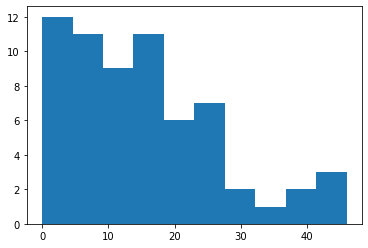

In [55]:
plt.hist(a)

In [56]:
a.std()

11.728238883207798

In [57]:
df['Home Score_x_x'].describe()

count    831.000000
mean      27.269555
std       13.599150
min        0.000000
25%       17.000000
50%       27.000000
75%       38.000000
max       74.000000
Name: Home Score_x_x, dtype: float64

In [58]:
#Majority of times the difference is less than the total over/under odds

In [59]:
df['Total Actual Score'] = df['Home Score_x_x'] + df['Away Score_x_x']
df['Diff btwn Total Odds & Actual Score Total'] = df['Total Actual Score'] - df['Total_x']

(array([ 43., 169., 271., 212.,  95.,  35.,   5.,   0.,   0.,   1.]),
 array([-40.5, -26.4, -12.3,   1.8,  15.9,  30. ,  44.1,  58.2,  72.3,
         86.4, 100.5]),
 <BarContainer object of 10 artists>)

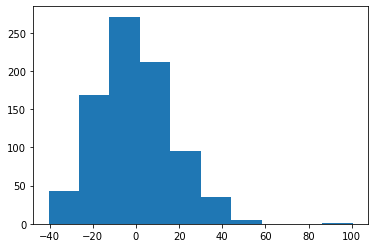

In [60]:
plt.hist(df['Diff btwn Total Odds & Actual Score Total'])

In [61]:
df['Diff btwn Total Odds & Actual Score Total'].describe()

count    831.000000
mean      -0.361613
std       17.073004
min      -40.500000
25%      -13.000000
50%       -1.500000
75%       10.500000
max      100.500000
Name: Diff btwn Total Odds & Actual Score Total, dtype: float64

In [62]:
negative_diff = df[df['Diff btwn Total Odds & Actual Score Total'] < 0]

In [63]:
positive_diff = df[df['Diff btwn Total Odds & Actual Score Total'] > 0]

In [64]:
Push_diff = df[df['Diff btwn Total Odds & Actual Score Total'] == 0]

In [65]:
neg_count=negative_diff['Date'].count()

In [66]:
push_count=Push_diff['Date'].count()

In [67]:
pos_count=positive_diff['Date'].count()

In [68]:
total_count= push_count + neg_count + pos_count

In [69]:
neg_count/total_count

0.5306859205776173

In [70]:
(neg_count+push_count)/total_count

0.5439229843561973

In [71]:
push_count_20=Push_diff[Push_diff['Year']==2020].count()

In [72]:
pos_count_20=positive_diff[positive_diff['Year']==2020].count()

In [73]:
neg_count_20=negative_diff[negative_diff['Year']==2020].count()

In [74]:
pos_count_20['Year']

32

In [75]:
neg_count_20['Year']

35

In [76]:
push_count_20['Year']

0

In [77]:
push_count_19=Push_diff[Push_diff['Year']==2019].count()

In [78]:
pos_count_19=positive_diff[positive_diff['Year']==2019].count()

In [79]:
neg_count_19=negative_diff[negative_diff['Year']==2019].count()

In [80]:
push_count_19['Year'],pos_count_19['Year'],neg_count_19['Year']

(1, 20, 33)

In [81]:
push_count_18=Push_diff[Push_diff['Year']==2018].count()

In [82]:
pos_count_18=positive_diff[positive_diff['Year']==2018].count()

In [83]:
neg_count_18=negative_diff[negative_diff['Year']==2018].count()

In [84]:
push_count_18['Year'],pos_count_18['Year'],neg_count_18['Year']

(0, 22, 32)

In [85]:
push_count_17=Push_diff[Push_diff['Year']==2017].count()
pos_count_17=positive_diff[positive_diff['Year']==2017].count()
neg_count_17=negative_diff[negative_diff['Year']==2017].count()
push_count_17['Year'],pos_count_17['Year'],neg_count_17['Year']


(0, 30, 24)

In [86]:
push_count_16=Push_diff[Push_diff['Year']==2016].count()
pos_count_16=positive_diff[positive_diff['Year']==2016].count()
neg_count_16=negative_diff[negative_diff['Year']==2016].count()
push_count_16['Year'],pos_count_16['Year'],neg_count_16['Year']


(0, 23, 31)

In [87]:
push_count_15=Push_diff[Push_diff['Year']==2015].count()
pos_count_15=positive_diff[positive_diff['Year']==2015].count()
neg_count_15=negative_diff[negative_diff['Year']==2015].count()
push_count_15['Year'],pos_count_15['Year'],neg_count_15['Year']


(1, 15, 37)

In [88]:
push_count_14=Push_diff[Push_diff['Year']==2014].count()
pos_count_14=positive_diff[positive_diff['Year']==2014].count()
neg_count_14=negative_diff[negative_diff['Year']==2014].count()
push_count_14['Year'],pos_count_14['Year'],neg_count_14['Year']


(0, 26, 28)

In [89]:
push_count_13=Push_diff[Push_diff['Year']==2013].count()
pos_count_13=positive_diff[positive_diff['Year']==2013].count()
neg_count_13=negative_diff[negative_diff['Year']==2013].count()
push_count_13['Year'],pos_count_13['Year'],neg_count_13['Year']


(1, 27, 20)

In [90]:
push_count_12=Push_diff[Push_diff['Year']==2012].count()
pos_count_12=positive_diff[positive_diff['Year']==2012].count()
neg_count_12=negative_diff[negative_diff['Year']==2012].count()
push_count_12['Year'],pos_count_12['Year'],neg_count_12['Year']


(1, 20, 16)

In [91]:
push_count_11=Push_diff[Push_diff['Year']==2011].count()
pos_count_11=positive_diff[positive_diff['Year']==2011].count()
neg_count_11=negative_diff[negative_diff['Year']==2011].count()
push_count_11['Year'],pos_count_11['Year'],neg_count_11['Year']


(1, 23, 23)

In [92]:
push_count_10=Push_diff[Push_diff['Year']==2010].count()
pos_count_10=positive_diff[positive_diff['Year']==2010].count()
neg_count_10=negative_diff[negative_diff['Year']==2010].count()
push_count_10['Year'],pos_count_10['Year'],neg_count_10['Year']


(1, 24, 22)

In [93]:
push_count_09=Push_diff[Push_diff['Year']==2009].count()
pos_count_09=positive_diff[positive_diff['Year']==2009].count()
neg_count_09=negative_diff[negative_diff['Year']==2009].count()
push_count_09['Year'],pos_count_09['Year'],neg_count_09['Year']


(2, 19, 26)

In [94]:
push_count_08=Push_diff[Push_diff['Year']==2008].count()
pos_count_08=positive_diff[positive_diff['Year']==2008].count()
neg_count_08=negative_diff[negative_diff['Year']==2008].count()
push_count_08['Year'],pos_count_08['Year'],neg_count_08['Year']


(1, 19, 27)

In [95]:
push_count_07=Push_diff[Push_diff['Year']==2007].count()
pos_count_07=positive_diff[positive_diff['Year']==2007].count()
neg_count_07=negative_diff[negative_diff['Year']==2007].count()
push_count_07['Year'],pos_count_07['Year'],neg_count_07['Year']


(0, 24, 24)

In [96]:
push_count_06=Push_diff[Push_diff['Year']==2006].count()
pos_count_06=positive_diff[positive_diff['Year']==2006].count()
neg_count_06=negative_diff[negative_diff['Year']==2006].count()
push_count_06['Year'],pos_count_06['Year'],neg_count_06['Year']


(1, 22, 23)

In [97]:
push_count_05=Push_diff[Push_diff['Year']==2005].count()
pos_count_05=positive_diff[positive_diff['Year']==2005].count()
neg_count_05=negative_diff[negative_diff['Year']==2005].count()
push_count_05['Year'],pos_count_05['Year'],neg_count_05['Year']


(0, 10, 11)

In [98]:
push_count_04=Push_diff[Push_diff['Year']==2004].count()
pos_count_04=positive_diff[positive_diff['Year']==2004].count()
neg_count_04=negative_diff[negative_diff['Year']==2004].count()
push_count_04['Year'],pos_count_04['Year'],neg_count_04['Year']


(0, 0, 0)

In [99]:
push_count_21=Push_diff[Push_diff['Year']==2021].count()
pos_count_21=positive_diff[positive_diff['Year']==2021].count()
neg_count_21=negative_diff[negative_diff['Year']==2021].count()
push_count_21['Year'],pos_count_21['Year'],neg_count_21['Year']


(1, 23, 29)

In [100]:
Rows = df['Year'].unique()

In [101]:
Rows_list = []
for i in Rows:
    Rows_list.append(i)
Rows_list

[2021,
 2020,
 2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005]

In [102]:
Columns = ['Pos','Neg','Push']

In [103]:
total_over_under_df = pd.DataFrame(index=Rows_list,columns=Columns)

In [104]:
total_over_under_df

,Pos,Neg,Push
2021,NaN,NaN,NaN
2020,NaN,NaN,NaN
2019,NaN,NaN,NaN
2018,NaN,NaN,NaN
2017,NaN,NaN,NaN
2016,NaN,NaN,NaN
2015,NaN,NaN,NaN
2014,NaN,NaN,NaN
2013,NaN,NaN,NaN
2012,NaN,NaN,NaN


In [105]:
total_over_under_df.loc[2021] = pos_count_21['Year'],neg_count_21['Year'],push_count_21['Year']


In [106]:
total_over_under_df

,Pos,Neg,Push
2021,23,29,1
2020,NaN,NaN,NaN
2019,NaN,NaN,NaN
2018,NaN,NaN,NaN
2017,NaN,NaN,NaN
2016,NaN,NaN,NaN
2015,NaN,NaN,NaN
2014,NaN,NaN,NaN
2013,NaN,NaN,NaN
2012,NaN,NaN,NaN


In [107]:
total_over_under_df.loc[2020] = pos_count_20['Year'],neg_count_20['Year'],push_count_20['Year']
total_over_under_df.loc[2019] = pos_count_19['Year'],neg_count_19['Year'],push_count_19['Year']
total_over_under_df.loc[2018] = pos_count_18['Year'],neg_count_18['Year'],push_count_18['Year']
total_over_under_df.loc[2017] = pos_count_17['Year'],neg_count_17['Year'],push_count_17['Year']
total_over_under_df.loc[2016] = pos_count_16['Year'],neg_count_16['Year'],push_count_16['Year']
total_over_under_df.loc[2015] = pos_count_15['Year'],neg_count_15['Year'],push_count_15['Year']
total_over_under_df.loc[2014] = pos_count_14['Year'],neg_count_14['Year'],push_count_14['Year']
total_over_under_df.loc[2013] = pos_count_13['Year'],neg_count_13['Year'],push_count_13['Year']
total_over_under_df.loc[2012] = pos_count_12['Year'],neg_count_12['Year'],push_count_12['Year']
total_over_under_df.loc[2011] = pos_count_11['Year'],neg_count_11['Year'],push_count_11['Year']
total_over_under_df.loc[2010] = pos_count_10['Year'],neg_count_10['Year'],push_count_10['Year']
total_over_under_df.loc[2009] = pos_count_09['Year'],neg_count_09['Year'],push_count_09['Year']
total_over_under_df.loc[2008] = pos_count_08['Year'],neg_count_08['Year'],push_count_08['Year']
total_over_under_df.loc[2007] = pos_count_07['Year'],neg_count_07['Year'],push_count_07['Year']
total_over_under_df.loc[2006] = pos_count_06['Year'],neg_count_06['Year'],push_count_06['Year']
total_over_under_df.loc[2005] = pos_count_05['Year'],neg_count_05['Year'],push_count_05['Year']

In [108]:
total_over_under_df

,Pos,Neg,Push
2021,23,29,1
2020,32,35,0
2019,20,33,1
2018,22,32,0
2017,30,24,0
2016,23,31,0
2015,15,37,1
2014,26,28,0
2013,27,20,1
2012,20,16,1


In [109]:
np.sum(total_over_under_df['Pos'])

379

In [110]:
np.sum(total_over_under_df['Neg'])

441

In [111]:
np.sum(total_over_under_df['Push'])

11

In [112]:
total_over_under_df['Total Count']= total_over_under_df['Pos'] + total_over_under_df['Neg'] + total_over_under_df['Push'] 

In [113]:
total_over_under_df['Neg %'] = total_over_under_df['Neg']/ total_over_under_df['Total Count']

In [114]:
total_over_under_df

,Pos,Neg,Push,Total Count,Neg %
2021,23,29,1,53,0.54717
2020,32,35,0,67,0.522388
2019,20,33,1,54,0.611111
2018,22,32,0,54,0.592593
2017,30,24,0,54,0.444444
2016,23,31,0,54,0.574074
2015,15,37,1,53,0.698113
2014,26,28,0,54,0.518519
2013,27,20,1,48,0.416667
2012,20,16,1,37,0.432432


In [115]:
total_over_under_df['Neg %'].mean()

0.5274368720704414

In [116]:
total_over_under_df['Neg_Pos_diff']= total_over_under_df['Neg'] - total_over_under_df['Pos']

In [117]:
total_over_under_df

,Pos,Neg,Push,Total Count,Neg %,Neg_Pos_diff
2021,23,29,1,53,0.54717,6
2020,32,35,0,67,0.522388,3
2019,20,33,1,54,0.611111,13
2018,22,32,0,54,0.592593,10
2017,30,24,0,54,0.444444,-6
2016,23,31,0,54,0.574074,8
2015,15,37,1,53,0.698113,22
2014,26,28,0,54,0.518519,2
2013,27,20,1,48,0.416667,-7
2012,20,16,1,37,0.432432,-4


In [118]:
np.sum(total_over_under_df['Neg_Pos_diff'])

62

In [119]:
stats.normaltest(total_over_under_df['Pos'])

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=1.7409796784457898, pvalue=0.4187463806002528)

In [120]:
stats.normaltest(total_over_under_df['Neg'])

NormaltestResult(statistic=0.08248510250406715, pvalue=0.9595963504222157)

In [121]:
T_ov_pos=total_over_under_df
T_ov_pos['Pos_Neg'] = T_ov_pos['Pos']
T_ov_pos['Pos_Neg_df'] = 'Pos_df'
T_ov_pos=T_ov_pos[['Pos_Neg','Pos_Neg_df']]


In [122]:
T_ov_neg=total_over_under_df
T_ov_neg['Pos_Neg'] = T_ov_neg['Neg']
T_ov_neg['Pos_Neg_df'] = 'Neg_df'
T_ov_neg=T_ov_neg[['Pos_Neg','Pos_Neg_df']]

In [123]:
T_ov_pos

,Pos_Neg,Pos_Neg_df
2021,23,Pos_df
2020,32,Pos_df
2019,20,Pos_df
2018,22,Pos_df
2017,30,Pos_df
2016,23,Pos_df
2015,15,Pos_df
2014,26,Pos_df
2013,27,Pos_df
2012,20,Pos_df


In [124]:
T_ov_neg

,Pos_Neg,Pos_Neg_df
2021,29,Neg_df
2020,35,Neg_df
2019,33,Neg_df
2018,32,Neg_df
2017,24,Neg_df
2016,31,Neg_df
2015,37,Neg_df
2014,28,Neg_df
2013,20,Neg_df
2012,16,Neg_df


In [125]:
T_ov= pd.concat([T_ov_pos,T_ov_neg])

In [126]:
T_ov.sample(10)

,Pos_Neg,Pos_Neg_df
2013,27,Pos_df
2018,32,Neg_df
2021,23,Pos_df
2017,24,Neg_df
2018,22,Pos_df
2007,24,Pos_df
2014,28,Neg_df
2020,35,Neg_df
2020,32,Pos_df
2017,30,Pos_df


In [127]:
T_ov['Pos_Neg'] = pd.to_numeric(T_ov['Pos_Neg'])

In [128]:
T_ov['Permutation1'] = np.random.permutation(T_ov['Pos_Neg'])

In [129]:
T_ov.groupby(by='Pos_Neg_df')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos_Neg_df,,,,,,,,
Neg_df,17.0,23.235294,7.040325,10.0,20.0,23.0,27.0,37.0
Pos_df,17.0,25.000000,5.338539,15.0,22.0,24.0,28.0,35.0


In [130]:
T_ov.groupby(by='Pos_Neg_df')['Pos_Neg'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos_Neg_df,,,,,,,,
Neg_df,17.0,25.941176,6.749728,11.0,23.0,26.0,31.0,37.0
Pos_df,17.0,22.294118,5.205342,10.0,20.0,23.0,24.0,32.0


In [131]:
difference = list()

In [132]:
for i in range(10000):
    permutation = np.random.permutation(T_ov['Pos_Neg'])
    difference.append(np.mean(permutation[T_ov['Pos_Neg_df']=='Neg_df']) - np.mean(permutation[T_ov['Pos_Neg_df']=='Pos_df']))

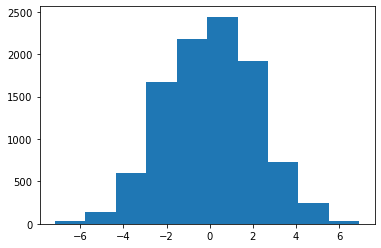

In [133]:
histo = plt.hist(difference)

In [134]:
obs_difference = np.mean(T_ov_neg['Pos_Neg']) - np.mean(T_ov_pos['Pos_Neg'])
obs_difference

3.647058823529413

In [135]:
obs_difference = abs(obs_difference)

In [136]:
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i] >= obs_difference):
        positiveExtremes.append(difference[i])
    elif (difference[i] <= -obs_difference):
        negativeExtremes.append(difference[i])

print(len(positiveExtremes))
print(len(negativeExtremes))

450
445


In [137]:
df.head()

Date  Year          Home Team  Home Team Ranking_x  Away Team  \
1 2021-11-27  2021                LSU                   99  Texas A&M   
2 2021-11-27  2021             Auburn                   99    Alabama   
3 2021-11-26  2021           Arkansas                   25   Missouri   
4 2021-11-25  2021  Mississippi State                   99   Ole Miss   
5 2021-11-20  2021     South Carolina                   99     Auburn   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
1                   15                 6.5                -6.5     27.0   
2                    3                19.5               -19.5     55.5   
3                   99               -14.5                14.5     63.0   
4                    9                -2.0                 2.0     65.0   
5                   99                 7.0                -7.0     45.5   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
1            27.0            24.0                      167.0   
2            22.0            24.0                      225.0   
3            34.0            17.0                      120.0   
4            21.0            31.0                      174.0   
5            21.0            17.0                      102.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
1                           33.4                           48.0   
2                           45.0                           55.0   
3                           24.0                           37.0   
4                           34.8                           54.0   
5                           20.4                           38.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
1                           19.0                       88.0   
2                           31.0                      118.0   
3                            6.0                       71.0   
4                           20.0                       72.0   
5                            3.0                       65.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
1                      29.333333                           35.0   
2                      39.333333                           49.0   
3                      23.666667                           37.0   
4                      24.000000                           31.0   
5                      21.666667                           38.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
1                           19.0             19.0   
2                           31.0             49.0   
3                            6.0              6.0   
4                           20.0             20.0   
5                            3.0              3.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
1                            1086.0                                 217.2   
2                            1550.0                                 310.0   
3                            1018.0                                 203.6   
4                            1396.0                                 279.2   
5                            1052.0                                 210.4   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
1                                 281.0                                 148.0   
2                                 385.0                                 208.0   
3                                 294.0                                  78.0   
4                                 412.0                                 213.0   
5                                 292.0                                 125.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
1                             666.0                            222.000000   
2                             957.0                            319.000000   
3                             590.0             

In [138]:
df=df.drop_duplicates()

In [139]:
df2 = df[['Year','Home Team','Home Team Ranking_x','Away Team','Away Team Ranking_x','Home Team Spread_x','Away Team Spread_x','Total_x','Home Score_x_x','Away Score_x_x','Home_Away_df','Total Actual Score','Diff btwn Total Odds & Actual Score Total']]

In [140]:
df2.head()

,Year,Home Team,Home Team Ranking_x,Away Team,Away Team Ranking_x,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Away Score_x_x,Home_Away_df,Total Actual Score,Diff btwn Total Odds & Actual Score Total
1,2021,LSU,99,Texas A&M,15,6.5,-6.5,27.0,27.0,24.0,Away_df,51.0,24.0
2,2021,Auburn,99,Alabama,3,19.5,-19.5,55.5,22.0,24.0,Away_df,46.0,-9.5
3,2021,Arkansas,25,Missouri,99,-14.5,14.5,63.0,34.0,17.0,Away_df,51.0,-12.0
4,2021,Mississippi State,99,Ole Miss,9,-2.0,2.0,65.0,21.0,31.0,Away_df,52.0,-13.0
5,2021,South Carolina,99,Auburn,99,7.0,-7.0,45.5,21.0,17.0,Away_df,38.0,-7.5


In [141]:
df_21=df2[df2['Year'] ==2021]
    

In [142]:
df_21_Al=df_21[df_21['Home Team'] == 'Alabama']

In [143]:
df_21_Al

,Year,Home Team,Home Team Ranking_x,Away Team,Away Team Ranking_x,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Away Score_x_x,Home_Away_df,Total Actual Score,Diff btwn Total Odds & Actual Score Total
8,2021,Alabama,1,Arkansas,21,-20.5,20.5,58.5,42.0,35.0,Away_df,77.0,18.5
15,2021,Alabama,2,LSU,99,-29.0,29.0,67.0,20.0,14.0,Away_df,34.0,-33.0
26,2021,Alabama,4,Tennessee,99,-25.0,25.0,68.0,52.0,24.0,Away_df,76.0,8.0
41,2021,Alabama,1,Ole Miss,12,-15.0,15.0,79.5,42.0,21.0,Away_df,63.0,-16.5


In [144]:
df_21_Al_pos = df_21_Al['Year'][df_21_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()

In [145]:
df_21_Al_neg = df_21_Al['Year'][df_21_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()

In [146]:
df_21_Al_push = df_21_Al['Year'][df_21_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()

In [147]:
df_21_Al_pos

2

In [148]:
df_21_Al_neg

2

In [149]:
df_21_Al_push

0

In [157]:
df_21_Au=df_21[df_21['Home Team'] == 'Auburn']
df_21_Ar=df_21[df_21['Home Team'] == 'Arkansas']
df_21_Ms=df_21[df_21['Home Team'] == 'Mississippi State']
df_21_Sc=df_21[df_21['Home Team'] == 'South Carolina']
df_21_Om=df_21[df_21['Home Team'] == 'Ole Miss']
df_21_Mi=df_21[df_21['Home Team'] == 'Missouri']
df_21_Tn=df_21[df_21['Home Team'] == 'Tennessee']
df_21_V=df_21[df_21['Home Team'] == 'Vanderbilt']
df_21_K=df_21[df_21['Home Team'] == 'Kentucky']
df_21_T=df_21[df_21['Home Team'] == 'Texas A&M']
df_21_G=df_21[df_21['Home Team'] == 'Georgia']
df_21_F=df_21[df_21['Home Team'] == 'Florida']
df_21_LSU=df_21[df_21['Home Team'] == 'LSU']

In [158]:
lista= [df_21_LSU,df_21_Al,df_21_F,df_21_G,df_21_T,df_21_K,df_21_V,df_21_Tn,df_21_Mi,df_21_Om,df_21_Sc,df_21_Ms,df_21_Ar,df_21_Au]

In [159]:
for i in lista:
    a = i
    print(a.shape)
    

(4, 13)
(4, 13)
(3, 13)
(4, 13)
(4, 13)
(4, 13)
(4, 13)
(3, 13)
(4, 13)
(4, 13)
(4, 13)
(4, 13)
(3, 13)
(4, 13)


In [160]:
df_21_F_pos = df_21_F['Year'][df_21_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_F_neg = df_21_F['Year'][df_21_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_F_push = df_21_F['Year'][df_21_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_21_G_pos = df_21_G['Year'][df_21_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_G_neg = df_21_G['Year'][df_21_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_G_push = df_21_G['Year'][df_21_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_21_T_pos = df_21_T['Year'][df_21_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_T_neg = df_21_T['Year'][df_21_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_T_push = df_21_T['Year'][df_21_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_21_K_pos = df_21_K['Year'][df_21_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_K_neg = df_21_K['Year'][df_21_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_K_push = df_21_K['Year'][df_21_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_21_V_pos = df_21_V['Year'][df_21_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_V_neg = df_21_V['Year'][df_21_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_V_push = df_21_V['Year'][df_21_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_21_Tn_pos = df_21_Tn['Year'][df_21_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_Tn_neg = df_21_Tn['Year'][df_21_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_Tn_push = df_21_Tn['Year'][df_21_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_21_Mi_pos = df_21_Mi['Year'][df_21_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_Mi_neg = df_21_Mi['Year'][df_21_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_Mi_push = df_21_Mi['Year'][df_21_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_21_Om_pos = df_21_Om['Year'][df_21_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_Om_neg = df_21_Om['Year'][df_21_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_Om_push = df_21_Om['Year'][df_21_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_21_Sc_pos = df_21_Sc['Year'][df_21_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_Sc_neg = df_21_Sc['Year'][df_21_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_Sc_push = df_21_Sc['Year'][df_21_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_21_Ms_pos = df_21_Ms['Year'][df_21_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_Ms_neg = df_21_Ms['Year'][df_21_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_Ms_push = df_21_Ms['Year'][df_21_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_21_Ar_pos = df_21_Ar['Year'][df_21_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_Ar_neg = df_21_Ar['Year'][df_21_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_Ar_push = df_21_Ar['Year'][df_21_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_21_Au_pos = df_21_Au['Year'][df_21_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_Au_neg = df_21_Au['Year'][df_21_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_Au_push = df_21_Au['Year'][df_21_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_21_LSU_pos = df_21_LSU['Year'][df_21_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_21_LSU_neg = df_21_LSU['Year'][df_21_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_21_LSU_push = df_21_LSU['Year'][df_21_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [161]:
Rows = [
    "21_Alabama",
"21_Auburn",
"21_Arkansas",
"21_Mississippi_State",
"21_South_Carolina",
"21_Ole_Miss",
"21_Missouri",
"21_Tennessee",
"21_Vanderbilt",
"21_Kentucky",
"21_TexasA_M",
"21_Georgia",
"21_Florida",
"21_LSU",
"20_Alabama",
"20_Auburn",
"20_Arkansas",
"20_Mississippi_State",
"20_South_Carolina",
"20_Ole_Miss",
"20_Missouri",
"20_Tennessee",
"20_Vanderbilt",
"20_Kentucky",
"20_TexasA_M",
"20_Georgia",
"20_Florida",
"20_LSU",
"19_Alabama",
"19_Auburn",
"19_Arkansas",
"19_Mississippi_State",
"19_South_Carolina",
"19_Ole_Miss",
"19_Missouri",
"19_Tennessee",
"19_Vanderbilt",
"19_Kentucky",
"19_TexasA_M",
"19_Georgia",
"19_Florida",
"19_LSU",
"18_Alabama",
"18_Auburn",
"18_Arkansas",
"18_Mississippi_State",
"18_South_Carolina",
"18_Ole_Miss",
"18_Missouri",
"18_Tennessee",
"18_Vanderbilt",
"18_Kentucky",
"18_TexasA_M",
"18_Georgia",
"18_Florida",
"18_LSU",
"17_Alabama",
"17_Auburn",
"17_Arkansas",
"17_Mississippi_State",
"17_South_Carolina",
"17_Ole_Miss",
"17_Missouri",
"17_Tennessee",
"17_Vanderbilt",
"17_Kentucky",
"17_TexasA_M",
"17_Georgia",
"17_Florida",
"17_LSU",
"16_Alabama",
"16_Auburn",
"16_Arkansas",
"16_Mississippi_State",
"16_South_Carolina",
"16_Ole_Miss",
"16_Missouri",
"16_Tennessee",
"16_Vanderbilt",
"16_Kentucky",
"16_TexasA_M",
"16_Georgia",
"16_Florida",
"16_LSU",
"15_Alabama",
"15_Auburn",
"15_Arkansas",
"15_Mississippi_State",
"15_South_Carolina",
"15_Ole_Miss",
"15_Missouri",
"15_Tennessee",
"15_Vanderbilt",
"15_Kentucky",
"15_TexasA_M",
"15_Georgia",
"15_Florida",
"15_LSU",
"14_Alabama",
"14_Auburn",
"14_Arkansas",
"14_Mississippi_State",
"14_South_Carolina",
"14_Ole_Miss",
"14_Missouri",
"14_Tennessee",
"14_Vanderbilt",
"14_Kentucky",
"14_TexasA_M",
"14_Georgia",
"14_Florida",
"14_LSU",
"13_Alabama",
"13_Auburn",
"13_Arkansas",
"13_Mississippi_State",
"13_South_Carolina",
"13_Ole_Miss",
"13_Missouri",
"13_Tennessee",
"13_Vanderbilt",
"13_Kentucky",
"13_TexasA_M",
"13_Georgia",
"13_Florida",
"13_LSU",
"12_Alabama",
"12_Auburn",
"12_Arkansas",
"12_Mississippi_State",
"12_South_Carolina",
"12_Ole_Miss",
"12_Missouri",
"12_Tennessee",
"12_Vanderbilt",
"12_Kentucky",
"12_TexasA_M",
"12_Georgia",
"12_Florida",
"12_LSU",
"11_Alabama",
"11_Auburn",
"11_Arkansas",
"11_Mississippi_State",
"11_South_Carolina",
"11_Ole_Miss",
"11_Missouri",
"11_Tennessee",
"11_Vanderbilt",
"11_Kentucky",
"11_TexasA_M",
"11_Georgia",
"11_Florida",
"11_LSU",
"10_Alabama",
"10_Auburn",
"10_Arkansas",
"10_Mississippi_State",
"10_South_Carolina",
"10_Ole_Miss",
"10_Missouri",
"10_Tennessee",
"10_Vanderbilt",
"10_Kentucky",
"10_TexasA_M",
"10_Georgia",
"10_Florida",
"10_LSU",
"9_Alabama",
"9_Auburn",
"9_Arkansas",
"9_Mississippi_State",
"9_South_Carolina",
"9_Ole_Miss",
"9_Missouri",
"9_Tennessee",
"9_Vanderbilt",
"9_Kentucky",
"9_TexasA_M",
"9_Georgia",
"9_Florida",
"9_LSU",
"8_Alabama",
"8_Auburn",
"8_Arkansas",
"8_Mississippi_State",
"8_South_Carolina",
"8_Ole_Miss",
"8_Missouri",
"8_Tennessee",
"8_Vanderbilt",
"8_Kentucky",
"8_TexasA_M",
"8_Georgia",
"8_Florida",
"8_LSU",
"7_Alabama",
"7_Auburn",
"7_Arkansas",
"7_Mississippi_State",
"7_South_Carolina",
"7_Ole_Miss",
"7_Missouri",
"7_Tennessee",
"7_Vanderbilt",
"7_Kentucky",
"7_TexasA_M",
"7_Georgia",
"7_Florida",
"7_LSU",
"6_Alabama",
"6_Auburn",
"6_Arkansas",
"6_Mississippi_State",
"6_South_Carolina",
"6_Ole_Miss",
"6_Missouri",
"6_Tennessee",
"6_Vanderbilt",
"6_Kentucky",
"6_TexasA_M",
"6_Georgia",
"6_Florida",
"6_LSU",
"5_Alabama",
"5_Auburn",
"5_Arkansas",
"5_Mississippi_State",
"5_South_Carolina",
"5_Ole_Miss",
"5_Missouri",
"5_Tennessee",
"5_Vanderbilt",
"5_Kentucky",
"5_TexasA_M",
"5_Georgia",
"5_Florida",
"5_LSU",
]

In [163]:
Columns

['Pos', 'Neg', 'Push']

In [167]:
Total_odds_df = pd.DataFrame(index=Rows,columns=Columns)

In [168]:
Total_odds_df

,Pos,Neg,Push
21_Alabama,NaN,NaN,NaN
21_Auburn,NaN,NaN,NaN
21_Arkansas,NaN,NaN,NaN
21_Mississippi_State,NaN,NaN,NaN
21_South_Carolina,NaN,NaN,NaN
21_Ole_Miss,NaN,NaN,NaN
21_Missouri,NaN,NaN,NaN
21_Tennessee,NaN,NaN,NaN
21_Vanderbilt,NaN,NaN,NaN
21_Kentucky,NaN,NaN,NaN


In [171]:
Total_odds_df.loc['21_Alabama'] = df_21_Al_pos,df_21_Al_neg,df_21_Al_push

In [172]:
Total_odds_df.head()

,Pos,Neg,Push
21_Alabama,2,2,0
21_Auburn,NaN,NaN,NaN
21_Arkansas,NaN,NaN,NaN
21_Mississippi_State,NaN,NaN,NaN
21_South_Carolina,NaN,NaN,NaN


In [173]:
Total_odds_df.loc['21_Auburn'] = df_21_Au_pos,df_21_Au_neg,df_21_Au_push
Total_odds_df.loc['21_Arkansas'] = df_21_Ar_pos,df_21_Ar_neg,df_21_Ar_push
Total_odds_df.loc['21_Mississippi_State'] = df_21_Ms_pos,df_21_Ms_neg,df_21_Ms_push
Total_odds_df.loc['21_South_Carolina'] = df_21_Sc_pos,df_21_Sc_neg,df_21_Sc_push
Total_odds_df.loc['21_Ole_Miss'] = df_21_Om_pos,df_21_Om_neg,df_21_Om_push
Total_odds_df.loc['21_Missouri'] = df_21_Mi_pos,df_21_Mi_neg,df_21_Mi_push
Total_odds_df.loc['21_Tennessee'] = df_21_Tn_pos,df_21_Tn_neg,df_21_Tn_push
Total_odds_df.loc['21_Vanderbilt'] = df_21_V_pos,df_21_V_neg,df_21_V_push
Total_odds_df.loc['21_Kentucky'] = df_21_K_pos,df_21_K_neg,df_21_K_push
Total_odds_df.loc['21_TexasA_M'] = df_21_T_pos,df_21_T_neg,df_21_T_push
Total_odds_df.loc['21_Georgia'] = df_21_G_pos,df_21_G_neg,df_21_G_push
Total_odds_df.loc['21_Florida'] = df_21_F_pos,df_21_F_neg,df_21_F_push
Total_odds_df.loc['21_LSU'] = df_21_LSU_pos,df_21_LSU_neg,df_21_LSU_push

In [174]:
Total_odds_df.head(14)

,Pos,Neg,Push
21_Alabama,2,2,0
21_Auburn,1,3,0
21_Arkansas,2,1,0
21_Mississippi_State,1,3,0
21_South_Carolina,1,3,0
21_Ole_Miss,1,3,0
21_Missouri,2,2,0
21_Tennessee,2,1,0
21_Vanderbilt,2,2,0
21_Kentucky,3,1,0


In [176]:
df_20=df2[df2['Year'] ==2020]
df_19=df2[df2['Year'] ==2019]
df_18=df2[df2['Year'] ==2018]
df_17=df2[df2['Year'] ==2017]
df_16=df2[df2['Year'] ==2016]
df_15=df2[df2['Year'] ==2015]
df_14=df2[df2['Year'] ==2014]
df_13=df2[df2['Year'] ==2013]
df_12=df2[df2['Year'] ==2012]
df_11=df2[df2['Year'] ==2011]
df_10=df2[df2['Year'] ==2010]
df_9=df2[df2['Year'] ==2009]
df_8=df2[df2['Year'] ==2008]
df_7=df2[df2['Year'] ==2007]
df_6=df2[df2['Year'] ==2006]
df_5=df2[df2['Year'] ==2005]

In [177]:
df_20_Al=df_20[df_20['Home Team'] == 'Alabama']
df_20_Au=df_20[df_20['Home Team'] == 'Auburn']
df_20_Ar=df_20[df_20['Home Team'] == 'Arkansas']
df_20_Ms=df_20[df_20['Home Team'] == 'Mississippi State']
df_20_Sc=df_20[df_20['Home Team'] == 'South Carolina']
df_20_Om=df_20[df_20['Home Team'] == 'Ole Miss']
df_20_Mi=df_20[df_20['Home Team'] == 'Missouri']
df_20_Tn=df_20[df_20['Home Team'] == 'Tennessee']
df_20_V=df_20[df_20['Home Team'] == 'Vanderbilt']
df_20_K=df_20[df_20['Home Team'] == 'Kentucky']
df_20_T=df_20[df_20['Home Team'] == 'Texas A&M']
df_20_G=df_20[df_20['Home Team'] == 'Georgia']
df_20_F=df_20[df_20['Home Team'] == 'Florida']
df_20_LSU=df_20[df_20['Home Team'] == 'LSU']

df_19_Al=df_19[df_19['Home Team'] == 'Alabama']
df_19_Au=df_19[df_19['Home Team'] == 'Auburn']
df_19_Ar=df_19[df_19['Home Team'] == 'Arkansas']
df_19_Ms=df_19[df_19['Home Team'] == 'Mississippi State']
df_19_Sc=df_19[df_19['Home Team'] == 'South Carolina']
df_19_Om=df_19[df_19['Home Team'] == 'Ole Miss']
df_19_Mi=df_19[df_19['Home Team'] == 'Missouri']
df_19_Tn=df_19[df_19['Home Team'] == 'Tennessee']
df_19_V=df_19[df_19['Home Team'] == 'Vanderbilt']
df_19_K=df_19[df_19['Home Team'] == 'Kentucky']
df_19_T=df_19[df_19['Home Team'] == 'Texas A&M']
df_19_G=df_19[df_19['Home Team'] == 'Georgia']
df_19_F=df_19[df_19['Home Team'] == 'Florida']
df_19_LSU=df_19[df_19['Home Team'] == 'LSU']

df_18_Al=df_18[df_18['Home Team'] == 'Alabama']
df_18_Au=df_18[df_18['Home Team'] == 'Auburn']
df_18_Ar=df_18[df_18['Home Team'] == 'Arkansas']
df_18_Ms=df_18[df_18['Home Team'] == 'Mississippi State']
df_18_Sc=df_18[df_18['Home Team'] == 'South Carolina']
df_18_Om=df_18[df_18['Home Team'] == 'Ole Miss']
df_18_Mi=df_18[df_18['Home Team'] == 'Missouri']
df_18_Tn=df_18[df_18['Home Team'] == 'Tennessee']
df_18_V=df_18[df_18['Home Team'] == 'Vanderbilt']
df_18_K=df_18[df_18['Home Team'] == 'Kentucky']
df_18_T=df_18[df_18['Home Team'] == 'Texas A&M']
df_18_G=df_18[df_18['Home Team'] == 'Georgia']
df_18_F=df_18[df_18['Home Team'] == 'Florida']
df_18_LSU=df_18[df_18['Home Team'] == 'LSU']


df_17_Al=df_17[df_17['Home Team'] == 'Alabama']
df_17_Au=df_17[df_17['Home Team'] == 'Auburn']
df_17_Ar=df_17[df_17['Home Team'] == 'Arkansas']
df_17_Ms=df_17[df_17['Home Team'] == 'Mississippi State']
df_17_Sc=df_17[df_17['Home Team'] == 'South Carolina']
df_17_Om=df_17[df_17['Home Team'] == 'Ole Miss']
df_17_Mi=df_17[df_17['Home Team'] == 'Missouri']
df_17_Tn=df_17[df_17['Home Team'] == 'Tennessee']
df_17_V=df_17[df_17['Home Team'] == 'Vanderbilt']
df_17_K=df_17[df_17['Home Team'] == 'Kentucky']
df_17_T=df_17[df_17['Home Team'] == 'Texas A&M']
df_17_G=df_17[df_17['Home Team'] == 'Georgia']
df_17_F=df_17[df_17['Home Team'] == 'Florida']
df_17_LSU=df_17[df_17['Home Team'] == 'LSU']

df_16_Al=df_16[df_16['Home Team'] == 'Alabama']
df_16_Au=df_16[df_16['Home Team'] == 'Auburn']
df_16_Ar=df_16[df_16['Home Team'] == 'Arkansas']
df_16_Ms=df_16[df_16['Home Team'] == 'Mississippi State']
df_16_Sc=df_16[df_16['Home Team'] == 'South Carolina']
df_16_Om=df_16[df_16['Home Team'] == 'Ole Miss']
df_16_Mi=df_16[df_16['Home Team'] == 'Missouri']
df_16_Tn=df_16[df_16['Home Team'] == 'Tennessee']
df_16_V=df_16[df_16['Home Team'] == 'Vanderbilt']
df_16_K=df_16[df_16['Home Team'] == 'Kentucky']
df_16_T=df_16[df_16['Home Team'] == 'Texas A&M']
df_16_G=df_16[df_16['Home Team'] == 'Georgia']
df_16_F=df_16[df_16['Home Team'] == 'Florida']
df_16_LSU=df_16[df_16['Home Team'] == 'LSU']

df_15_Al=df_15[df_15['Home Team'] == 'Alabama']
df_15_Au=df_15[df_15['Home Team'] == 'Auburn']
df_15_Ar=df_15[df_15['Home Team'] == 'Arkansas']
df_15_Ms=df_15[df_15['Home Team'] == 'Mississippi State']
df_15_Sc=df_15[df_15['Home Team'] == 'South Carolina']
df_15_Om=df_15[df_15['Home Team'] == 'Ole Miss']
df_15_Mi=df_15[df_15['Home Team'] == 'Missouri']
df_15_Tn=df_15[df_15['Home Team'] == 'Tennessee']
df_15_V=df_15[df_15['Home Team'] == 'Vanderbilt']
df_15_K=df_15[df_15['Home Team'] == 'Kentucky']
df_15_T=df_15[df_15['Home Team'] == 'Texas A&M']
df_15_G=df_15[df_15['Home Team'] == 'Georgia']
df_15_F=df_15[df_15['Home Team'] == 'Florida']
df_15_LSU=df_15[df_15['Home Team'] == 'LSU']

df_14_Al=df_14[df_14['Home Team'] == 'Alabama']
df_14_Au=df_14[df_14['Home Team'] == 'Auburn']
df_14_Ar=df_14[df_14['Home Team'] == 'Arkansas']
df_14_Ms=df_14[df_14['Home Team'] == 'Mississippi State']
df_14_Sc=df_14[df_14['Home Team'] == 'South Carolina']
df_14_Om=df_14[df_14['Home Team'] == 'Ole Miss']
df_14_Mi=df_14[df_14['Home Team'] == 'Missouri']
df_14_Tn=df_14[df_14['Home Team'] == 'Tennessee']
df_14_V=df_14[df_14['Home Team'] == 'Vanderbilt']
df_14_K=df_14[df_14['Home Team'] == 'Kentucky']
df_14_T=df_14[df_14['Home Team'] == 'Texas A&M']
df_14_G=df_14[df_14['Home Team'] == 'Georgia']
df_14_F=df_14[df_14['Home Team'] == 'Florida']
df_14_LSU=df_14[df_14['Home Team'] == 'LSU']

df_13_Al=df_13[df_13['Home Team'] == 'Alabama']
df_13_Au=df_13[df_13['Home Team'] == 'Auburn']
df_13_Ar=df_13[df_13['Home Team'] == 'Arkansas']
df_13_Ms=df_13[df_13['Home Team'] == 'Mississippi State']
df_13_Sc=df_13[df_13['Home Team'] == 'South Carolina']
df_13_Om=df_13[df_13['Home Team'] == 'Ole Miss']
df_13_Mi=df_13[df_13['Home Team'] == 'Missouri']
df_13_Tn=df_13[df_13['Home Team'] == 'Tennessee']
df_13_V=df_13[df_13['Home Team'] == 'Vanderbilt']
df_13_K=df_13[df_13['Home Team'] == 'Kentucky']
df_13_T=df_13[df_13['Home Team'] == 'Texas A&M']
df_13_G=df_13[df_13['Home Team'] == 'Georgia']
df_13_F=df_13[df_13['Home Team'] == 'Florida']
df_13_LSU=df_13[df_13['Home Team'] == 'LSU']

df_12_Al=df_12[df_12['Home Team'] == 'Alabama']
df_12_Au=df_12[df_12['Home Team'] == 'Auburn']
df_12_Ar=df_12[df_12['Home Team'] == 'Arkansas']
df_12_Ms=df_12[df_12['Home Team'] == 'Mississippi State']
df_12_Sc=df_12[df_12['Home Team'] == 'South Carolina']
df_12_Om=df_12[df_12['Home Team'] == 'Ole Miss']
df_12_Mi=df_12[df_12['Home Team'] == 'Missouri']
df_12_Tn=df_12[df_12['Home Team'] == 'Tennessee']
df_12_V=df_12[df_12['Home Team'] == 'Vanderbilt']
df_12_K=df_12[df_12['Home Team'] == 'Kentucky']
df_12_T=df_12[df_12['Home Team'] == 'Texas A&M']
df_12_G=df_12[df_12['Home Team'] == 'Georgia']
df_12_F=df_12[df_12['Home Team'] == 'Florida']
df_12_LSU=df_12[df_12['Home Team'] == 'LSU']

df_11_Al=df_11[df_11['Home Team'] == 'Alabama']
df_11_Au=df_11[df_11['Home Team'] == 'Auburn']
df_11_Ar=df_11[df_11['Home Team'] == 'Arkansas']
df_11_Ms=df_11[df_11['Home Team'] == 'Mississippi State']
df_11_Sc=df_11[df_11['Home Team'] == 'South Carolina']
df_11_Om=df_11[df_11['Home Team'] == 'Ole Miss']
df_11_Mi=df_11[df_11['Home Team'] == 'Missouri']
df_11_Tn=df_11[df_11['Home Team'] == 'Tennessee']
df_11_V=df_11[df_11['Home Team'] == 'Vanderbilt']
df_11_K=df_11[df_11['Home Team'] == 'Kentucky']
df_11_T=df_11[df_11['Home Team'] == 'Texas A&M']
df_11_G=df_11[df_11['Home Team'] == 'Georgia']
df_11_F=df_11[df_11['Home Team'] == 'Florida']
df_11_LSU=df_11[df_11['Home Team'] == 'LSU']

df_10_Al=df_10[df_10['Home Team'] == 'Alabama']
df_10_Au=df_10[df_10['Home Team'] == 'Auburn']
df_10_Ar=df_10[df_10['Home Team'] == 'Arkansas']
df_10_Ms=df_10[df_10['Home Team'] == 'Mississippi State']
df_10_Sc=df_10[df_10['Home Team'] == 'South Carolina']
df_10_Om=df_10[df_10['Home Team'] == 'Ole Miss']
df_10_Mi=df_10[df_10['Home Team'] == 'Missouri']
df_10_Tn=df_10[df_10['Home Team'] == 'Tennessee']
df_10_V=df_10[df_10['Home Team'] == 'Vanderbilt']
df_10_K=df_10[df_10['Home Team'] == 'Kentucky']
df_10_T=df_10[df_10['Home Team'] == 'Texas A&M']
df_10_G=df_10[df_10['Home Team'] == 'Georgia']
df_10_F=df_10[df_10['Home Team'] == 'Florida']
df_10_LSU=df_10[df_10['Home Team'] == 'LSU']

df_9_Al=df_9[df_9['Home Team'] == 'Alabama']
df_9_Au=df_9[df_9['Home Team'] == 'Auburn']
df_9_Ar=df_9[df_9['Home Team'] == 'Arkansas']
df_9_Ms=df_9[df_9['Home Team'] == 'Mississippi State']
df_9_Sc=df_9[df_9['Home Team'] == 'South Carolina']
df_9_Om=df_9[df_9['Home Team'] == 'Ole Miss']
df_9_Mi=df_9[df_9['Home Team'] == 'Missouri']
df_9_Tn=df_9[df_9['Home Team'] == 'Tennessee']
df_9_V=df_9[df_9['Home Team'] == 'Vanderbilt']
df_9_K=df_9[df_9['Home Team'] == 'Kentucky']
df_9_T=df_9[df_9['Home Team'] == 'Texas A&M']
df_9_G=df_9[df_9['Home Team'] == 'Georgia']
df_9_F=df_9[df_9['Home Team'] == 'Florida']
df_9_LSU=df_9[df_9['Home Team'] == 'LSU']

df_8_Al=df_8[df_8['Home Team'] == 'Alabama']
df_8_Au=df_8[df_8['Home Team'] == 'Auburn']
df_8_Ar=df_8[df_8['Home Team'] == 'Arkansas']
df_8_Ms=df_8[df_8['Home Team'] == 'Mississippi State']
df_8_Sc=df_8[df_8['Home Team'] == 'South Carolina']
df_8_Om=df_8[df_8['Home Team'] == 'Ole Miss']
df_8_Mi=df_8[df_8['Home Team'] == 'Missouri']
df_8_Tn=df_8[df_8['Home Team'] == 'Tennessee']
df_8_V=df_8[df_8['Home Team'] == 'Vanderbilt']
df_8_K=df_8[df_8['Home Team'] == 'Kentucky']
df_8_T=df_8[df_8['Home Team'] == 'Texas A&M']
df_8_G=df_8[df_8['Home Team'] == 'Georgia']
df_8_F=df_8[df_8['Home Team'] == 'Florida']
df_8_LSU=df_8[df_8['Home Team'] == 'LSU']

df_7_Al=df_7[df_7['Home Team'] == 'Alabama']
df_7_Au=df_7[df_7['Home Team'] == 'Auburn']
df_7_Ar=df_7[df_7['Home Team'] == 'Arkansas']
df_7_Ms=df_7[df_7['Home Team'] == 'Mississippi State']
df_7_Sc=df_7[df_7['Home Team'] == 'South Carolina']
df_7_Om=df_7[df_7['Home Team'] == 'Ole Miss']
df_7_Mi=df_7[df_7['Home Team'] == 'Missouri']
df_7_Tn=df_7[df_7['Home Team'] == 'Tennessee']
df_7_V=df_7[df_7['Home Team'] == 'Vanderbilt']
df_7_K=df_7[df_7['Home Team'] == 'Kentucky']
df_7_T=df_7[df_7['Home Team'] == 'Texas A&M']
df_7_G=df_7[df_7['Home Team'] == 'Georgia']
df_7_F=df_7[df_7['Home Team'] == 'Florida']
df_7_LSU=df_7[df_7['Home Team'] == 'LSU']

df_6_Al=df_6[df_6['Home Team'] == 'Alabama']
df_6_Au=df_6[df_6['Home Team'] == 'Auburn']
df_6_Ar=df_6[df_6['Home Team'] == 'Arkansas']
df_6_Ms=df_6[df_6['Home Team'] == 'Mississippi State']
df_6_Sc=df_6[df_6['Home Team'] == 'South Carolina']
df_6_Om=df_6[df_6['Home Team'] == 'Ole Miss']
df_6_Mi=df_6[df_6['Home Team'] == 'Missouri']
df_6_Tn=df_6[df_6['Home Team'] == 'Tennessee']
df_6_V=df_6[df_6['Home Team'] == 'Vanderbilt']
df_6_K=df_6[df_6['Home Team'] == 'Kentucky']
df_6_T=df_6[df_6['Home Team'] == 'Texas A&M']
df_6_G=df_6[df_6['Home Team'] == 'Georgia']
df_6_F=df_6[df_6['Home Team'] == 'Florida']
df_6_LSU=df_6[df_6['Home Team'] == 'LSU']

df_5_Al=df_5[df_5['Home Team'] == 'Alabama']
df_5_Au=df_5[df_5['Home Team'] == 'Auburn']
df_5_Ar=df_5[df_5['Home Team'] == 'Arkansas']
df_5_Ms=df_5[df_5['Home Team'] == 'Mississippi State']
df_5_Sc=df_5[df_5['Home Team'] == 'South Carolina']
df_5_Om=df_5[df_5['Home Team'] == 'Ole Miss']
df_5_Mi=df_5[df_5['Home Team'] == 'Missouri']
df_5_Tn=df_5[df_5['Home Team'] == 'Tennessee']
df_5_V=df_5[df_5['Home Team'] == 'Vanderbilt']
df_5_K=df_5[df_5['Home Team'] == 'Kentucky']
df_5_T=df_5[df_5['Home Team'] == 'Texas A&M']
df_5_G=df_5[df_5['Home Team'] == 'Georgia']
df_5_F=df_5[df_5['Home Team'] == 'Florida']
df_5_LSU=df_5[df_5['Home Team'] == 'LSU']


In [179]:
df_20_Al_pos = df_20_Al['Year'][df_20_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_Al_neg = df_20_Al['Year'][df_20_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_Al_push = df_20_Al['Year'][df_20_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_20_F_pos = df_20_F['Year'][df_20_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_F_neg = df_20_F['Year'][df_20_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_F_push = df_20_F['Year'][df_20_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_20_G_pos = df_20_G['Year'][df_20_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_G_neg = df_20_G['Year'][df_20_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_G_push = df_20_G['Year'][df_20_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_20_T_pos = df_20_T['Year'][df_20_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_T_neg = df_20_T['Year'][df_20_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_T_push = df_20_T['Year'][df_20_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_20_K_pos = df_20_K['Year'][df_20_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_K_neg = df_20_K['Year'][df_20_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_K_push = df_20_K['Year'][df_20_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_20_V_pos = df_20_V['Year'][df_20_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_V_neg = df_20_V['Year'][df_20_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_V_push = df_20_V['Year'][df_20_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_20_Tn_pos = df_20_Tn['Year'][df_20_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_Tn_neg = df_20_Tn['Year'][df_20_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_Tn_push = df_20_Tn['Year'][df_20_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_20_Mi_pos = df_20_Mi['Year'][df_20_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_Mi_neg = df_20_Mi['Year'][df_20_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_Mi_push = df_20_Mi['Year'][df_20_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_20_Om_pos = df_20_Om['Year'][df_20_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_Om_neg = df_20_Om['Year'][df_20_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_Om_push = df_20_Om['Year'][df_20_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_20_Sc_pos = df_20_Sc['Year'][df_20_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_Sc_neg = df_20_Sc['Year'][df_20_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_Sc_push = df_20_Sc['Year'][df_20_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_20_Ms_pos = df_20_Ms['Year'][df_20_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_Ms_neg = df_20_Ms['Year'][df_20_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_Ms_push = df_20_Ms['Year'][df_20_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_20_Ar_pos = df_20_Ar['Year'][df_20_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_Ar_neg = df_20_Ar['Year'][df_20_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_Ar_push = df_20_Ar['Year'][df_20_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_20_Au_pos = df_20_Au['Year'][df_20_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_Au_neg = df_20_Au['Year'][df_20_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_Au_push = df_20_Au['Year'][df_20_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_20_LSU_pos = df_20_LSU['Year'][df_20_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_20_LSU_neg = df_20_LSU['Year'][df_20_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_20_LSU_push = df_20_LSU['Year'][df_20_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [180]:
Total_odds_df.loc['20_Alabama'] = df_20_Al_pos,df_20_Al_neg,df_20_Al_push
Total_odds_df.loc['20_Auburn'] = df_20_Au_pos,df_20_Au_neg,df_20_Au_push
Total_odds_df.loc['20_Arkansas'] = df_20_Ar_pos,df_20_Ar_neg,df_20_Ar_push
Total_odds_df.loc['20_Mississippi_State'] = df_20_Ms_pos,df_20_Ms_neg,df_20_Ms_push
Total_odds_df.loc['20_South_Carolina'] = df_20_Sc_pos,df_20_Sc_neg,df_20_Sc_push
Total_odds_df.loc['20_Ole_Miss'] = df_20_Om_pos,df_20_Om_neg,df_20_Om_push
Total_odds_df.loc['20_Missouri'] = df_20_Mi_pos,df_20_Mi_neg,df_20_Mi_push
Total_odds_df.loc['20_Tennessee'] = df_20_Tn_pos,df_20_Tn_neg,df_20_Tn_push
Total_odds_df.loc['20_Vanderbilt'] = df_20_V_pos,df_20_V_neg,df_20_V_push
Total_odds_df.loc['20_Kentucky'] = df_20_K_pos,df_20_K_neg,df_20_K_push
Total_odds_df.loc['20_TexasA_M'] = df_20_T_pos,df_20_T_neg,df_20_T_push
Total_odds_df.loc['20_Georgia'] = df_20_G_pos,df_20_G_neg,df_20_G_push
Total_odds_df.loc['20_Florida'] = df_20_F_pos,df_20_F_neg,df_20_F_push
Total_odds_df.loc['20_LSU'] = df_20_LSU_pos,df_20_LSU_neg,df_20_LSU_push


In [181]:
Total_odds_df.head(30)

,Pos,Neg,Push
21_Alabama,2,2,0
21_Auburn,1,3,0
21_Arkansas,2,1,0
21_Mississippi_State,1,3,0
21_South_Carolina,1,3,0
21_Ole_Miss,1,3,0
21_Missouri,2,2,0
21_Tennessee,2,1,0
21_Vanderbilt,2,2,0
21_Kentucky,3,1,0


In [183]:
df_19_Al_pos = df_19_Al['Year'][df_19_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_Al_neg = df_19_Al['Year'][df_19_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_Al_push = df_19_Al['Year'][df_19_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_19_F_pos = df_19_F['Year'][df_19_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_F_neg = df_19_F['Year'][df_19_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_F_push = df_19_F['Year'][df_19_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_19_G_pos = df_19_G['Year'][df_19_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_G_neg = df_19_G['Year'][df_19_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_G_push = df_19_G['Year'][df_19_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_19_T_pos = df_19_T['Year'][df_19_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_T_neg = df_19_T['Year'][df_19_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_T_push = df_19_T['Year'][df_19_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_19_K_pos = df_19_K['Year'][df_19_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_K_neg = df_19_K['Year'][df_19_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_K_push = df_19_K['Year'][df_19_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_19_V_pos = df_19_V['Year'][df_19_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_V_neg = df_19_V['Year'][df_19_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_V_push = df_19_V['Year'][df_19_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_19_Tn_pos = df_19_Tn['Year'][df_19_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_Tn_neg = df_19_Tn['Year'][df_19_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_Tn_push = df_19_Tn['Year'][df_19_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_19_Mi_pos = df_19_Mi['Year'][df_19_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_Mi_neg = df_19_Mi['Year'][df_19_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_Mi_push = df_19_Mi['Year'][df_19_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_19_Om_pos = df_19_Om['Year'][df_19_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_Om_neg = df_19_Om['Year'][df_19_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_Om_push = df_19_Om['Year'][df_19_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_19_Sc_pos = df_19_Sc['Year'][df_19_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_Sc_neg = df_19_Sc['Year'][df_19_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_Sc_push = df_19_Sc['Year'][df_19_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_19_Ms_pos = df_19_Ms['Year'][df_19_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_Ms_neg = df_19_Ms['Year'][df_19_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_Ms_push = df_19_Ms['Year'][df_19_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_19_Ar_pos = df_19_Ar['Year'][df_19_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_Ar_neg = df_19_Ar['Year'][df_19_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_Ar_push = df_19_Ar['Year'][df_19_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_19_Au_pos = df_19_Au['Year'][df_19_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_Au_neg = df_19_Au['Year'][df_19_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_Au_push = df_19_Au['Year'][df_19_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_19_LSU_pos = df_19_LSU['Year'][df_19_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_19_LSU_neg = df_19_LSU['Year'][df_19_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_19_LSU_push = df_19_LSU['Year'][df_19_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [184]:
Total_odds_df.loc['19_Alabama'] = df_19_Al_pos,df_19_Al_neg,df_19_Al_push
Total_odds_df.loc['19_Auburn'] = df_19_Au_pos,df_19_Au_neg,df_19_Au_push
Total_odds_df.loc['19_Arkansas'] = df_19_Ar_pos,df_19_Ar_neg,df_19_Ar_push
Total_odds_df.loc['19_Mississippi_State'] = df_19_Ms_pos,df_19_Ms_neg,df_19_Ms_push
Total_odds_df.loc['19_South_Carolina'] = df_19_Sc_pos,df_19_Sc_neg,df_19_Sc_push
Total_odds_df.loc['19_Ole_Miss'] = df_19_Om_pos,df_19_Om_neg,df_19_Om_push
Total_odds_df.loc['19_Missouri'] = df_19_Mi_pos,df_19_Mi_neg,df_19_Mi_push
Total_odds_df.loc['19_Tennessee'] = df_19_Tn_pos,df_19_Tn_neg,df_19_Tn_push
Total_odds_df.loc['19_Vanderbilt'] = df_19_V_pos,df_19_V_neg,df_19_V_push
Total_odds_df.loc['19_Kentucky'] = df_19_K_pos,df_19_K_neg,df_19_K_push
Total_odds_df.loc['19_TexasA_M'] = df_19_T_pos,df_19_T_neg,df_19_T_push
Total_odds_df.loc['19_Georgia'] = df_19_G_pos,df_19_G_neg,df_19_G_push
Total_odds_df.loc['19_Florida'] = df_19_F_pos,df_19_F_neg,df_19_F_push
Total_odds_df.loc['19_LSU'] = df_19_LSU_pos,df_19_LSU_neg,df_19_LSU_push


In [185]:
df_18_Al_pos = df_18_Al['Year'][df_18_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_Al_neg = df_18_Al['Year'][df_18_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_Al_push = df_18_Al['Year'][df_18_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_18_F_pos = df_18_F['Year'][df_18_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_F_neg = df_18_F['Year'][df_18_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_F_push = df_18_F['Year'][df_18_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_18_G_pos = df_18_G['Year'][df_18_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_G_neg = df_18_G['Year'][df_18_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_G_push = df_18_G['Year'][df_18_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_18_T_pos = df_18_T['Year'][df_18_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_T_neg = df_18_T['Year'][df_18_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_T_push = df_18_T['Year'][df_18_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_18_K_pos = df_18_K['Year'][df_18_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_K_neg = df_18_K['Year'][df_18_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_K_push = df_18_K['Year'][df_18_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_18_V_pos = df_18_V['Year'][df_18_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_V_neg = df_18_V['Year'][df_18_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_V_push = df_18_V['Year'][df_18_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_18_Tn_pos = df_18_Tn['Year'][df_18_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_Tn_neg = df_18_Tn['Year'][df_18_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_Tn_push = df_18_Tn['Year'][df_18_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_18_Mi_pos = df_18_Mi['Year'][df_18_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_Mi_neg = df_18_Mi['Year'][df_18_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_Mi_push = df_18_Mi['Year'][df_18_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_18_Om_pos = df_18_Om['Year'][df_18_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_Om_neg = df_18_Om['Year'][df_18_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_Om_push = df_18_Om['Year'][df_18_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_18_Sc_pos = df_18_Sc['Year'][df_18_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_Sc_neg = df_18_Sc['Year'][df_18_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_Sc_push = df_18_Sc['Year'][df_18_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_18_Ms_pos = df_18_Ms['Year'][df_18_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_Ms_neg = df_18_Ms['Year'][df_18_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_Ms_push = df_18_Ms['Year'][df_18_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_18_Ar_pos = df_18_Ar['Year'][df_18_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_Ar_neg = df_18_Ar['Year'][df_18_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_Ar_push = df_18_Ar['Year'][df_18_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_18_Au_pos = df_18_Au['Year'][df_18_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_Au_neg = df_18_Au['Year'][df_18_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_Au_push = df_18_Au['Year'][df_18_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_18_LSU_pos = df_18_LSU['Year'][df_18_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_18_LSU_neg = df_18_LSU['Year'][df_18_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_18_LSU_push = df_18_LSU['Year'][df_18_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [186]:
Total_odds_df.loc['18_Alabama'] = df_18_Al_pos,df_18_Al_neg,df_18_Al_push
Total_odds_df.loc['18_Auburn'] = df_18_Au_pos,df_18_Au_neg,df_18_Au_push
Total_odds_df.loc['18_Arkansas'] = df_18_Ar_pos,df_18_Ar_neg,df_18_Ar_push
Total_odds_df.loc['18_Mississippi_State'] = df_18_Ms_pos,df_18_Ms_neg,df_18_Ms_push
Total_odds_df.loc['18_South_Carolina'] = df_18_Sc_pos,df_18_Sc_neg,df_18_Sc_push
Total_odds_df.loc['18_Ole_Miss'] = df_18_Om_pos,df_18_Om_neg,df_18_Om_push
Total_odds_df.loc['18_Missouri'] = df_18_Mi_pos,df_18_Mi_neg,df_18_Mi_push
Total_odds_df.loc['18_Tennessee'] = df_18_Tn_pos,df_18_Tn_neg,df_18_Tn_push
Total_odds_df.loc['18_Vanderbilt'] = df_18_V_pos,df_18_V_neg,df_18_V_push
Total_odds_df.loc['18_Kentucky'] = df_18_K_pos,df_18_K_neg,df_18_K_push
Total_odds_df.loc['18_TexasA_M'] = df_18_T_pos,df_18_T_neg,df_18_T_push
Total_odds_df.loc['18_Georgia'] = df_18_G_pos,df_18_G_neg,df_18_G_push
Total_odds_df.loc['18_Florida'] = df_18_F_pos,df_18_F_neg,df_18_F_push
Total_odds_df.loc['18_LSU'] = df_18_LSU_pos,df_18_LSU_neg,df_18_LSU_push


In [187]:
df_17_Al_pos = df_17_Al['Year'][df_17_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_Al_neg = df_17_Al['Year'][df_17_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_Al_push = df_17_Al['Year'][df_17_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_17_F_pos = df_17_F['Year'][df_17_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_F_neg = df_17_F['Year'][df_17_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_F_push = df_17_F['Year'][df_17_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_17_G_pos = df_17_G['Year'][df_17_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_G_neg = df_17_G['Year'][df_17_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_G_push = df_17_G['Year'][df_17_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_17_T_pos = df_17_T['Year'][df_17_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_T_neg = df_17_T['Year'][df_17_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_T_push = df_17_T['Year'][df_17_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_17_K_pos = df_17_K['Year'][df_17_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_K_neg = df_17_K['Year'][df_17_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_K_push = df_17_K['Year'][df_17_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_17_V_pos = df_17_V['Year'][df_17_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_V_neg = df_17_V['Year'][df_17_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_V_push = df_17_V['Year'][df_17_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_17_Tn_pos = df_17_Tn['Year'][df_17_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_Tn_neg = df_17_Tn['Year'][df_17_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_Tn_push = df_17_Tn['Year'][df_17_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_17_Mi_pos = df_17_Mi['Year'][df_17_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_Mi_neg = df_17_Mi['Year'][df_17_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_Mi_push = df_17_Mi['Year'][df_17_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_17_Om_pos = df_17_Om['Year'][df_17_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_Om_neg = df_17_Om['Year'][df_17_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_Om_push = df_17_Om['Year'][df_17_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_17_Sc_pos = df_17_Sc['Year'][df_17_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_Sc_neg = df_17_Sc['Year'][df_17_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_Sc_push = df_17_Sc['Year'][df_17_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_17_Ms_pos = df_17_Ms['Year'][df_17_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_Ms_neg = df_17_Ms['Year'][df_17_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_Ms_push = df_17_Ms['Year'][df_17_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_17_Ar_pos = df_17_Ar['Year'][df_17_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_Ar_neg = df_17_Ar['Year'][df_17_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_Ar_push = df_17_Ar['Year'][df_17_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_17_Au_pos = df_17_Au['Year'][df_17_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_Au_neg = df_17_Au['Year'][df_17_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_Au_push = df_17_Au['Year'][df_17_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_17_LSU_pos = df_17_LSU['Year'][df_17_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_17_LSU_neg = df_17_LSU['Year'][df_17_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_17_LSU_push = df_17_LSU['Year'][df_17_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [188]:
Total_odds_df.loc['17_Alabama'] = df_17_Al_pos,df_17_Al_neg,df_17_Al_push
Total_odds_df.loc['17_Auburn'] = df_17_Au_pos,df_17_Au_neg,df_17_Au_push
Total_odds_df.loc['17_Arkansas'] = df_17_Ar_pos,df_17_Ar_neg,df_17_Ar_push
Total_odds_df.loc['17_Mississippi_State'] = df_17_Ms_pos,df_17_Ms_neg,df_17_Ms_push
Total_odds_df.loc['17_South_Carolina'] = df_17_Sc_pos,df_17_Sc_neg,df_17_Sc_push
Total_odds_df.loc['17_Ole_Miss'] = df_17_Om_pos,df_17_Om_neg,df_17_Om_push
Total_odds_df.loc['17_Missouri'] = df_17_Mi_pos,df_17_Mi_neg,df_17_Mi_push
Total_odds_df.loc['17_Tennessee'] = df_17_Tn_pos,df_17_Tn_neg,df_17_Tn_push
Total_odds_df.loc['17_Vanderbilt'] = df_17_V_pos,df_17_V_neg,df_17_V_push
Total_odds_df.loc['17_Kentucky'] = df_17_K_pos,df_17_K_neg,df_17_K_push
Total_odds_df.loc['17_TexasA_M'] = df_17_T_pos,df_17_T_neg,df_17_T_push
Total_odds_df.loc['17_Georgia'] = df_17_G_pos,df_17_G_neg,df_17_G_push
Total_odds_df.loc['17_Florida'] = df_17_F_pos,df_17_F_neg,df_17_F_push
Total_odds_df.loc['17_LSU'] = df_17_LSU_pos,df_17_LSU_neg,df_17_LSU_push


In [189]:
df_16_Al_pos = df_16_Al['Year'][df_16_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_Al_neg = df_16_Al['Year'][df_16_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_Al_push = df_16_Al['Year'][df_16_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_16_F_pos = df_16_F['Year'][df_16_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_F_neg = df_16_F['Year'][df_16_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_F_push = df_16_F['Year'][df_16_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_16_G_pos = df_16_G['Year'][df_16_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_G_neg = df_16_G['Year'][df_16_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_G_push = df_16_G['Year'][df_16_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_16_T_pos = df_16_T['Year'][df_16_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_T_neg = df_16_T['Year'][df_16_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_T_push = df_16_T['Year'][df_16_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_16_K_pos = df_16_K['Year'][df_16_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_K_neg = df_16_K['Year'][df_16_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_K_push = df_16_K['Year'][df_16_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_16_V_pos = df_16_V['Year'][df_16_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_V_neg = df_16_V['Year'][df_16_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_V_push = df_16_V['Year'][df_16_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_16_Tn_pos = df_16_Tn['Year'][df_16_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_Tn_neg = df_16_Tn['Year'][df_16_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_Tn_push = df_16_Tn['Year'][df_16_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_16_Mi_pos = df_16_Mi['Year'][df_16_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_Mi_neg = df_16_Mi['Year'][df_16_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_Mi_push = df_16_Mi['Year'][df_16_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_16_Om_pos = df_16_Om['Year'][df_16_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_Om_neg = df_16_Om['Year'][df_16_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_Om_push = df_16_Om['Year'][df_16_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_16_Sc_pos = df_16_Sc['Year'][df_16_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_Sc_neg = df_16_Sc['Year'][df_16_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_Sc_push = df_16_Sc['Year'][df_16_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_16_Ms_pos = df_16_Ms['Year'][df_16_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_Ms_neg = df_16_Ms['Year'][df_16_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_Ms_push = df_16_Ms['Year'][df_16_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_16_Ar_pos = df_16_Ar['Year'][df_16_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_Ar_neg = df_16_Ar['Year'][df_16_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_Ar_push = df_16_Ar['Year'][df_16_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_16_Au_pos = df_16_Au['Year'][df_16_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_Au_neg = df_16_Au['Year'][df_16_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_Au_push = df_16_Au['Year'][df_16_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_16_LSU_pos = df_16_LSU['Year'][df_16_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_16_LSU_neg = df_16_LSU['Year'][df_16_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_16_LSU_push = df_16_LSU['Year'][df_16_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [190]:
Total_odds_df.loc['16_Alabama'] = df_16_Al_pos,df_16_Al_neg,df_16_Al_push
Total_odds_df.loc['16_Auburn'] = df_16_Au_pos,df_16_Au_neg,df_16_Au_push
Total_odds_df.loc['16_Arkansas'] = df_16_Ar_pos,df_16_Ar_neg,df_16_Ar_push
Total_odds_df.loc['16_Mississippi_State'] = df_16_Ms_pos,df_16_Ms_neg,df_16_Ms_push
Total_odds_df.loc['16_South_Carolina'] = df_16_Sc_pos,df_16_Sc_neg,df_16_Sc_push
Total_odds_df.loc['16_Ole_Miss'] = df_16_Om_pos,df_16_Om_neg,df_16_Om_push
Total_odds_df.loc['16_Missouri'] = df_16_Mi_pos,df_16_Mi_neg,df_16_Mi_push
Total_odds_df.loc['16_Tennessee'] = df_16_Tn_pos,df_16_Tn_neg,df_16_Tn_push
Total_odds_df.loc['16_Vanderbilt'] = df_16_V_pos,df_16_V_neg,df_16_V_push
Total_odds_df.loc['16_Kentucky'] = df_16_K_pos,df_16_K_neg,df_16_K_push
Total_odds_df.loc['16_TexasA_M'] = df_16_T_pos,df_16_T_neg,df_16_T_push
Total_odds_df.loc['16_Georgia'] = df_16_G_pos,df_16_G_neg,df_16_G_push
Total_odds_df.loc['16_Florida'] = df_16_F_pos,df_16_F_neg,df_16_F_push
Total_odds_df.loc['16_LSU'] = df_16_LSU_pos,df_16_LSU_neg,df_16_LSU_push


In [191]:
df_15_Al_pos = df_15_Al['Year'][df_15_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_Al_neg = df_15_Al['Year'][df_15_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_Al_push = df_15_Al['Year'][df_15_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_15_F_pos = df_15_F['Year'][df_15_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_F_neg = df_15_F['Year'][df_15_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_F_push = df_15_F['Year'][df_15_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_15_G_pos = df_15_G['Year'][df_15_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_G_neg = df_15_G['Year'][df_15_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_G_push = df_15_G['Year'][df_15_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_15_T_pos = df_15_T['Year'][df_15_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_T_neg = df_15_T['Year'][df_15_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_T_push = df_15_T['Year'][df_15_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_15_K_pos = df_15_K['Year'][df_15_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_K_neg = df_15_K['Year'][df_15_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_K_push = df_15_K['Year'][df_15_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_15_V_pos = df_15_V['Year'][df_15_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_V_neg = df_15_V['Year'][df_15_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_V_push = df_15_V['Year'][df_15_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_15_Tn_pos = df_15_Tn['Year'][df_15_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_Tn_neg = df_15_Tn['Year'][df_15_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_Tn_push = df_15_Tn['Year'][df_15_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_15_Mi_pos = df_15_Mi['Year'][df_15_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_Mi_neg = df_15_Mi['Year'][df_15_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_Mi_push = df_15_Mi['Year'][df_15_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_15_Om_pos = df_15_Om['Year'][df_15_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_Om_neg = df_15_Om['Year'][df_15_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_Om_push = df_15_Om['Year'][df_15_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_15_Sc_pos = df_15_Sc['Year'][df_15_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_Sc_neg = df_15_Sc['Year'][df_15_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_Sc_push = df_15_Sc['Year'][df_15_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_15_Ms_pos = df_15_Ms['Year'][df_15_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_Ms_neg = df_15_Ms['Year'][df_15_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_Ms_push = df_15_Ms['Year'][df_15_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_15_Ar_pos = df_15_Ar['Year'][df_15_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_Ar_neg = df_15_Ar['Year'][df_15_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_Ar_push = df_15_Ar['Year'][df_15_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_15_Au_pos = df_15_Au['Year'][df_15_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_Au_neg = df_15_Au['Year'][df_15_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_Au_push = df_15_Au['Year'][df_15_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_15_LSU_pos = df_15_LSU['Year'][df_15_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_15_LSU_neg = df_15_LSU['Year'][df_15_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_15_LSU_push = df_15_LSU['Year'][df_15_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [192]:
Total_odds_df.loc['15_Alabama'] = df_15_Al_pos,df_15_Al_neg,df_15_Al_push
Total_odds_df.loc['15_Auburn'] = df_15_Au_pos,df_15_Au_neg,df_15_Au_push
Total_odds_df.loc['15_Arkansas'] = df_15_Ar_pos,df_15_Ar_neg,df_15_Ar_push
Total_odds_df.loc['15_Mississippi_State'] = df_15_Ms_pos,df_15_Ms_neg,df_15_Ms_push
Total_odds_df.loc['15_South_Carolina'] = df_15_Sc_pos,df_15_Sc_neg,df_15_Sc_push
Total_odds_df.loc['15_Ole_Miss'] = df_15_Om_pos,df_15_Om_neg,df_15_Om_push
Total_odds_df.loc['15_Missouri'] = df_15_Mi_pos,df_15_Mi_neg,df_15_Mi_push
Total_odds_df.loc['15_Tennessee'] = df_15_Tn_pos,df_15_Tn_neg,df_15_Tn_push
Total_odds_df.loc['15_Vanderbilt'] = df_15_V_pos,df_15_V_neg,df_15_V_push
Total_odds_df.loc['15_Kentucky'] = df_15_K_pos,df_15_K_neg,df_15_K_push
Total_odds_df.loc['15_TexasA_M'] = df_15_T_pos,df_15_T_neg,df_15_T_push
Total_odds_df.loc['15_Georgia'] = df_15_G_pos,df_15_G_neg,df_15_G_push
Total_odds_df.loc['15_Florida'] = df_15_F_pos,df_15_F_neg,df_15_F_push
Total_odds_df.loc['15_LSU'] = df_15_LSU_pos,df_15_LSU_neg,df_15_LSU_push


In [193]:
df_14_Al_pos = df_14_Al['Year'][df_14_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_Al_neg = df_14_Al['Year'][df_14_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_Al_push = df_14_Al['Year'][df_14_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_14_F_pos = df_14_F['Year'][df_14_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_F_neg = df_14_F['Year'][df_14_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_F_push = df_14_F['Year'][df_14_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_14_G_pos = df_14_G['Year'][df_14_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_G_neg = df_14_G['Year'][df_14_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_G_push = df_14_G['Year'][df_14_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_14_T_pos = df_14_T['Year'][df_14_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_T_neg = df_14_T['Year'][df_14_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_T_push = df_14_T['Year'][df_14_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_14_K_pos = df_14_K['Year'][df_14_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_K_neg = df_14_K['Year'][df_14_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_K_push = df_14_K['Year'][df_14_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_14_V_pos = df_14_V['Year'][df_14_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_V_neg = df_14_V['Year'][df_14_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_V_push = df_14_V['Year'][df_14_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_14_Tn_pos = df_14_Tn['Year'][df_14_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_Tn_neg = df_14_Tn['Year'][df_14_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_Tn_push = df_14_Tn['Year'][df_14_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_14_Mi_pos = df_14_Mi['Year'][df_14_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_Mi_neg = df_14_Mi['Year'][df_14_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_Mi_push = df_14_Mi['Year'][df_14_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_14_Om_pos = df_14_Om['Year'][df_14_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_Om_neg = df_14_Om['Year'][df_14_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_Om_push = df_14_Om['Year'][df_14_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_14_Sc_pos = df_14_Sc['Year'][df_14_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_Sc_neg = df_14_Sc['Year'][df_14_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_Sc_push = df_14_Sc['Year'][df_14_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_14_Ms_pos = df_14_Ms['Year'][df_14_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_Ms_neg = df_14_Ms['Year'][df_14_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_Ms_push = df_14_Ms['Year'][df_14_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_14_Ar_pos = df_14_Ar['Year'][df_14_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_Ar_neg = df_14_Ar['Year'][df_14_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_Ar_push = df_14_Ar['Year'][df_14_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_14_Au_pos = df_14_Au['Year'][df_14_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_Au_neg = df_14_Au['Year'][df_14_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_Au_push = df_14_Au['Year'][df_14_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_14_LSU_pos = df_14_LSU['Year'][df_14_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_14_LSU_neg = df_14_LSU['Year'][df_14_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_14_LSU_push = df_14_LSU['Year'][df_14_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [194]:
Total_odds_df.loc['14_Alabama'] = df_14_Al_pos,df_14_Al_neg,df_14_Al_push
Total_odds_df.loc['14_Auburn'] = df_14_Au_pos,df_14_Au_neg,df_14_Au_push
Total_odds_df.loc['14_Arkansas'] = df_14_Ar_pos,df_14_Ar_neg,df_14_Ar_push
Total_odds_df.loc['14_Mississippi_State'] = df_14_Ms_pos,df_14_Ms_neg,df_14_Ms_push
Total_odds_df.loc['14_South_Carolina'] = df_14_Sc_pos,df_14_Sc_neg,df_14_Sc_push
Total_odds_df.loc['14_Ole_Miss'] = df_14_Om_pos,df_14_Om_neg,df_14_Om_push
Total_odds_df.loc['14_Missouri'] = df_14_Mi_pos,df_14_Mi_neg,df_14_Mi_push
Total_odds_df.loc['14_Tennessee'] = df_14_Tn_pos,df_14_Tn_neg,df_14_Tn_push
Total_odds_df.loc['14_Vanderbilt'] = df_14_V_pos,df_14_V_neg,df_14_V_push
Total_odds_df.loc['14_Kentucky'] = df_14_K_pos,df_14_K_neg,df_14_K_push
Total_odds_df.loc['14_TexasA_M'] = df_14_T_pos,df_14_T_neg,df_14_T_push
Total_odds_df.loc['14_Georgia'] = df_14_G_pos,df_14_G_neg,df_14_G_push
Total_odds_df.loc['14_Florida'] = df_14_F_pos,df_14_F_neg,df_14_F_push
Total_odds_df.loc['14_LSU'] = df_14_LSU_pos,df_14_LSU_neg,df_14_LSU_push


In [195]:
df_13_Al_pos = df_13_Al['Year'][df_13_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_Al_neg = df_13_Al['Year'][df_13_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_Al_push = df_13_Al['Year'][df_13_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_13_F_pos = df_13_F['Year'][df_13_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_F_neg = df_13_F['Year'][df_13_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_F_push = df_13_F['Year'][df_13_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_13_G_pos = df_13_G['Year'][df_13_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_G_neg = df_13_G['Year'][df_13_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_G_push = df_13_G['Year'][df_13_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_13_T_pos = df_13_T['Year'][df_13_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_T_neg = df_13_T['Year'][df_13_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_T_push = df_13_T['Year'][df_13_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_13_K_pos = df_13_K['Year'][df_13_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_K_neg = df_13_K['Year'][df_13_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_K_push = df_13_K['Year'][df_13_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_13_V_pos = df_13_V['Year'][df_13_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_V_neg = df_13_V['Year'][df_13_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_V_push = df_13_V['Year'][df_13_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_13_Tn_pos = df_13_Tn['Year'][df_13_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_Tn_neg = df_13_Tn['Year'][df_13_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_Tn_push = df_13_Tn['Year'][df_13_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_13_Mi_pos = df_13_Mi['Year'][df_13_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_Mi_neg = df_13_Mi['Year'][df_13_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_Mi_push = df_13_Mi['Year'][df_13_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_13_Om_pos = df_13_Om['Year'][df_13_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_Om_neg = df_13_Om['Year'][df_13_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_Om_push = df_13_Om['Year'][df_13_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_13_Sc_pos = df_13_Sc['Year'][df_13_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_Sc_neg = df_13_Sc['Year'][df_13_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_Sc_push = df_13_Sc['Year'][df_13_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_13_Ms_pos = df_13_Ms['Year'][df_13_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_Ms_neg = df_13_Ms['Year'][df_13_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_Ms_push = df_13_Ms['Year'][df_13_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_13_Ar_pos = df_13_Ar['Year'][df_13_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_Ar_neg = df_13_Ar['Year'][df_13_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_Ar_push = df_13_Ar['Year'][df_13_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_13_Au_pos = df_13_Au['Year'][df_13_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_Au_neg = df_13_Au['Year'][df_13_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_Au_push = df_13_Au['Year'][df_13_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_13_LSU_pos = df_13_LSU['Year'][df_13_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_13_LSU_neg = df_13_LSU['Year'][df_13_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_13_LSU_push = df_13_LSU['Year'][df_13_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [196]:
Total_odds_df.loc['13_Alabama'] = df_13_Al_pos,df_13_Al_neg,df_13_Al_push
Total_odds_df.loc['13_Auburn'] = df_13_Au_pos,df_13_Au_neg,df_13_Au_push
Total_odds_df.loc['13_Arkansas'] = df_13_Ar_pos,df_13_Ar_neg,df_13_Ar_push
Total_odds_df.loc['13_Mississippi_State'] = df_13_Ms_pos,df_13_Ms_neg,df_13_Ms_push
Total_odds_df.loc['13_South_Carolina'] = df_13_Sc_pos,df_13_Sc_neg,df_13_Sc_push
Total_odds_df.loc['13_Ole_Miss'] = df_13_Om_pos,df_13_Om_neg,df_13_Om_push
Total_odds_df.loc['13_Missouri'] = df_13_Mi_pos,df_13_Mi_neg,df_13_Mi_push
Total_odds_df.loc['13_Tennessee'] = df_13_Tn_pos,df_13_Tn_neg,df_13_Tn_push
Total_odds_df.loc['13_Vanderbilt'] = df_13_V_pos,df_13_V_neg,df_13_V_push
Total_odds_df.loc['13_Kentucky'] = df_13_K_pos,df_13_K_neg,df_13_K_push
Total_odds_df.loc['13_TexasA_M'] = df_13_T_pos,df_13_T_neg,df_13_T_push
Total_odds_df.loc['13_Georgia'] = df_13_G_pos,df_13_G_neg,df_13_G_push
Total_odds_df.loc['13_Florida'] = df_13_F_pos,df_13_F_neg,df_13_F_push
Total_odds_df.loc['13_LSU'] = df_13_LSU_pos,df_13_LSU_neg,df_13_LSU_push


In [197]:
df_12_Al_pos = df_12_Al['Year'][df_12_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_Al_neg = df_12_Al['Year'][df_12_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_Al_push = df_12_Al['Year'][df_12_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_12_F_pos = df_12_F['Year'][df_12_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_F_neg = df_12_F['Year'][df_12_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_F_push = df_12_F['Year'][df_12_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_12_G_pos = df_12_G['Year'][df_12_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_G_neg = df_12_G['Year'][df_12_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_G_push = df_12_G['Year'][df_12_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_12_T_pos = df_12_T['Year'][df_12_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_T_neg = df_12_T['Year'][df_12_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_T_push = df_12_T['Year'][df_12_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_12_K_pos = df_12_K['Year'][df_12_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_K_neg = df_12_K['Year'][df_12_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_K_push = df_12_K['Year'][df_12_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_12_V_pos = df_12_V['Year'][df_12_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_V_neg = df_12_V['Year'][df_12_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_V_push = df_12_V['Year'][df_12_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_12_Tn_pos = df_12_Tn['Year'][df_12_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_Tn_neg = df_12_Tn['Year'][df_12_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_Tn_push = df_12_Tn['Year'][df_12_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_12_Mi_pos = df_12_Mi['Year'][df_12_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_Mi_neg = df_12_Mi['Year'][df_12_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_Mi_push = df_12_Mi['Year'][df_12_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_12_Om_pos = df_12_Om['Year'][df_12_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_Om_neg = df_12_Om['Year'][df_12_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_Om_push = df_12_Om['Year'][df_12_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_12_Sc_pos = df_12_Sc['Year'][df_12_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_Sc_neg = df_12_Sc['Year'][df_12_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_Sc_push = df_12_Sc['Year'][df_12_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_12_Ms_pos = df_12_Ms['Year'][df_12_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_Ms_neg = df_12_Ms['Year'][df_12_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_Ms_push = df_12_Ms['Year'][df_12_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_12_Ar_pos = df_12_Ar['Year'][df_12_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_Ar_neg = df_12_Ar['Year'][df_12_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_Ar_push = df_12_Ar['Year'][df_12_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_12_Au_pos = df_12_Au['Year'][df_12_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_Au_neg = df_12_Au['Year'][df_12_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_Au_push = df_12_Au['Year'][df_12_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_12_LSU_pos = df_12_LSU['Year'][df_12_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_12_LSU_neg = df_12_LSU['Year'][df_12_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_12_LSU_push = df_12_LSU['Year'][df_12_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [198]:
Total_odds_df.loc['12_Alabama'] = df_12_Al_pos,df_12_Al_neg,df_12_Al_push
Total_odds_df.loc['12_Auburn'] = df_12_Au_pos,df_12_Au_neg,df_12_Au_push
Total_odds_df.loc['12_Arkansas'] = df_12_Ar_pos,df_12_Ar_neg,df_12_Ar_push
Total_odds_df.loc['12_Mississippi_State'] = df_12_Ms_pos,df_12_Ms_neg,df_12_Ms_push
Total_odds_df.loc['12_South_Carolina'] = df_12_Sc_pos,df_12_Sc_neg,df_12_Sc_push
Total_odds_df.loc['12_Ole_Miss'] = df_12_Om_pos,df_12_Om_neg,df_12_Om_push
Total_odds_df.loc['12_Missouri'] = df_12_Mi_pos,df_12_Mi_neg,df_12_Mi_push
Total_odds_df.loc['12_Tennessee'] = df_12_Tn_pos,df_12_Tn_neg,df_12_Tn_push
Total_odds_df.loc['12_Vanderbilt'] = df_12_V_pos,df_12_V_neg,df_12_V_push
Total_odds_df.loc['12_Kentucky'] = df_12_K_pos,df_12_K_neg,df_12_K_push
Total_odds_df.loc['12_TexasA_M'] = df_12_T_pos,df_12_T_neg,df_12_T_push
Total_odds_df.loc['12_Georgia'] = df_12_G_pos,df_12_G_neg,df_12_G_push
Total_odds_df.loc['12_Florida'] = df_12_F_pos,df_12_F_neg,df_12_F_push
Total_odds_df.loc['12_LSU'] = df_12_LSU_pos,df_12_LSU_neg,df_12_LSU_push


In [199]:
df_11_Al_pos = df_11_Al['Year'][df_11_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_Al_neg = df_11_Al['Year'][df_11_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_Al_push = df_11_Al['Year'][df_11_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_11_F_pos = df_11_F['Year'][df_11_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_F_neg = df_11_F['Year'][df_11_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_F_push = df_11_F['Year'][df_11_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_11_G_pos = df_11_G['Year'][df_11_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_G_neg = df_11_G['Year'][df_11_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_G_push = df_11_G['Year'][df_11_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_11_T_pos = df_11_T['Year'][df_11_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_T_neg = df_11_T['Year'][df_11_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_T_push = df_11_T['Year'][df_11_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_11_K_pos = df_11_K['Year'][df_11_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_K_neg = df_11_K['Year'][df_11_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_K_push = df_11_K['Year'][df_11_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_11_V_pos = df_11_V['Year'][df_11_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_V_neg = df_11_V['Year'][df_11_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_V_push = df_11_V['Year'][df_11_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_11_Tn_pos = df_11_Tn['Year'][df_11_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_Tn_neg = df_11_Tn['Year'][df_11_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_Tn_push = df_11_Tn['Year'][df_11_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_11_Mi_pos = df_11_Mi['Year'][df_11_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_Mi_neg = df_11_Mi['Year'][df_11_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_Mi_push = df_11_Mi['Year'][df_11_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_11_Om_pos = df_11_Om['Year'][df_11_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_Om_neg = df_11_Om['Year'][df_11_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_Om_push = df_11_Om['Year'][df_11_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_11_Sc_pos = df_11_Sc['Year'][df_11_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_Sc_neg = df_11_Sc['Year'][df_11_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_Sc_push = df_11_Sc['Year'][df_11_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_11_Ms_pos = df_11_Ms['Year'][df_11_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_Ms_neg = df_11_Ms['Year'][df_11_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_Ms_push = df_11_Ms['Year'][df_11_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_11_Ar_pos = df_11_Ar['Year'][df_11_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_Ar_neg = df_11_Ar['Year'][df_11_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_Ar_push = df_11_Ar['Year'][df_11_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_11_Au_pos = df_11_Au['Year'][df_11_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_Au_neg = df_11_Au['Year'][df_11_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_Au_push = df_11_Au['Year'][df_11_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_11_LSU_pos = df_11_LSU['Year'][df_11_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_11_LSU_neg = df_11_LSU['Year'][df_11_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_11_LSU_push = df_11_LSU['Year'][df_11_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [200]:
Total_odds_df.loc['11_Alabama'] = df_11_Al_pos,df_11_Al_neg,df_11_Al_push
Total_odds_df.loc['11_Auburn'] = df_11_Au_pos,df_11_Au_neg,df_11_Au_push
Total_odds_df.loc['11_Arkansas'] = df_11_Ar_pos,df_11_Ar_neg,df_11_Ar_push
Total_odds_df.loc['11_Mississippi_State'] = df_11_Ms_pos,df_11_Ms_neg,df_11_Ms_push
Total_odds_df.loc['11_South_Carolina'] = df_11_Sc_pos,df_11_Sc_neg,df_11_Sc_push
Total_odds_df.loc['11_Ole_Miss'] = df_11_Om_pos,df_11_Om_neg,df_11_Om_push
Total_odds_df.loc['11_Missouri'] = df_11_Mi_pos,df_11_Mi_neg,df_11_Mi_push
Total_odds_df.loc['11_Tennessee'] = df_11_Tn_pos,df_11_Tn_neg,df_11_Tn_push
Total_odds_df.loc['11_Vanderbilt'] = df_11_V_pos,df_11_V_neg,df_11_V_push
Total_odds_df.loc['11_Kentucky'] = df_11_K_pos,df_11_K_neg,df_11_K_push
Total_odds_df.loc['11_TexasA_M'] = df_11_T_pos,df_11_T_neg,df_11_T_push
Total_odds_df.loc['11_Georgia'] = df_11_G_pos,df_11_G_neg,df_11_G_push
Total_odds_df.loc['11_Florida'] = df_11_F_pos,df_11_F_neg,df_11_F_push
Total_odds_df.loc['11_LSU'] = df_11_LSU_pos,df_11_LSU_neg,df_11_LSU_push


In [201]:
df_10_Al_pos = df_10_Al['Year'][df_10_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_Al_neg = df_10_Al['Year'][df_10_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_Al_push = df_10_Al['Year'][df_10_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_10_F_pos = df_10_F['Year'][df_10_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_F_neg = df_10_F['Year'][df_10_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_F_push = df_10_F['Year'][df_10_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_10_G_pos = df_10_G['Year'][df_10_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_G_neg = df_10_G['Year'][df_10_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_G_push = df_10_G['Year'][df_10_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_10_T_pos = df_10_T['Year'][df_10_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_T_neg = df_10_T['Year'][df_10_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_T_push = df_10_T['Year'][df_10_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_10_K_pos = df_10_K['Year'][df_10_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_K_neg = df_10_K['Year'][df_10_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_K_push = df_10_K['Year'][df_10_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_10_V_pos = df_10_V['Year'][df_10_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_V_neg = df_10_V['Year'][df_10_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_V_push = df_10_V['Year'][df_10_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_10_Tn_pos = df_10_Tn['Year'][df_10_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_Tn_neg = df_10_Tn['Year'][df_10_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_Tn_push = df_10_Tn['Year'][df_10_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_10_Mi_pos = df_10_Mi['Year'][df_10_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_Mi_neg = df_10_Mi['Year'][df_10_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_Mi_push = df_10_Mi['Year'][df_10_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_10_Om_pos = df_10_Om['Year'][df_10_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_Om_neg = df_10_Om['Year'][df_10_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_Om_push = df_10_Om['Year'][df_10_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_10_Sc_pos = df_10_Sc['Year'][df_10_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_Sc_neg = df_10_Sc['Year'][df_10_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_Sc_push = df_10_Sc['Year'][df_10_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_10_Ms_pos = df_10_Ms['Year'][df_10_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_Ms_neg = df_10_Ms['Year'][df_10_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_Ms_push = df_10_Ms['Year'][df_10_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_10_Ar_pos = df_10_Ar['Year'][df_10_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_Ar_neg = df_10_Ar['Year'][df_10_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_Ar_push = df_10_Ar['Year'][df_10_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_10_Au_pos = df_10_Au['Year'][df_10_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_Au_neg = df_10_Au['Year'][df_10_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_Au_push = df_10_Au['Year'][df_10_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_10_LSU_pos = df_10_LSU['Year'][df_10_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_10_LSU_neg = df_10_LSU['Year'][df_10_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_10_LSU_push = df_10_LSU['Year'][df_10_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [202]:
Total_odds_df.loc['10_Alabama'] = df_10_Al_pos,df_10_Al_neg,df_10_Al_push
Total_odds_df.loc['10_Auburn'] = df_10_Au_pos,df_10_Au_neg,df_10_Au_push
Total_odds_df.loc['10_Arkansas'] = df_10_Ar_pos,df_10_Ar_neg,df_10_Ar_push
Total_odds_df.loc['10_Mississippi_State'] = df_10_Ms_pos,df_10_Ms_neg,df_10_Ms_push
Total_odds_df.loc['10_South_Carolina'] = df_10_Sc_pos,df_10_Sc_neg,df_10_Sc_push
Total_odds_df.loc['10_Ole_Miss'] = df_10_Om_pos,df_10_Om_neg,df_10_Om_push
Total_odds_df.loc['10_Missouri'] = df_10_Mi_pos,df_10_Mi_neg,df_10_Mi_push
Total_odds_df.loc['10_Tennessee'] = df_10_Tn_pos,df_10_Tn_neg,df_10_Tn_push
Total_odds_df.loc['10_Vanderbilt'] = df_10_V_pos,df_10_V_neg,df_10_V_push
Total_odds_df.loc['10_Kentucky'] = df_10_K_pos,df_10_K_neg,df_10_K_push
Total_odds_df.loc['10_TexasA_M'] = df_10_T_pos,df_10_T_neg,df_10_T_push
Total_odds_df.loc['10_Georgia'] = df_10_G_pos,df_10_G_neg,df_10_G_push
Total_odds_df.loc['10_Florida'] = df_10_F_pos,df_10_F_neg,df_10_F_push
Total_odds_df.loc['10_LSU'] = df_10_LSU_pos,df_10_LSU_neg,df_10_LSU_push


In [203]:
df_9_Al_pos = df_9_Al['Year'][df_9_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_Al_neg = df_9_Al['Year'][df_9_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_Al_push = df_9_Al['Year'][df_9_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_9_F_pos = df_9_F['Year'][df_9_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_F_neg = df_9_F['Year'][df_9_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_F_push = df_9_F['Year'][df_9_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_9_G_pos = df_9_G['Year'][df_9_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_G_neg = df_9_G['Year'][df_9_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_G_push = df_9_G['Year'][df_9_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_9_T_pos = df_9_T['Year'][df_9_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_T_neg = df_9_T['Year'][df_9_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_T_push = df_9_T['Year'][df_9_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_9_K_pos = df_9_K['Year'][df_9_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_K_neg = df_9_K['Year'][df_9_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_K_push = df_9_K['Year'][df_9_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_9_V_pos = df_9_V['Year'][df_9_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_V_neg = df_9_V['Year'][df_9_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_V_push = df_9_V['Year'][df_9_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_9_Tn_pos = df_9_Tn['Year'][df_9_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_Tn_neg = df_9_Tn['Year'][df_9_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_Tn_push = df_9_Tn['Year'][df_9_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_9_Mi_pos = df_9_Mi['Year'][df_9_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_Mi_neg = df_9_Mi['Year'][df_9_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_Mi_push = df_9_Mi['Year'][df_9_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_9_Om_pos = df_9_Om['Year'][df_9_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_Om_neg = df_9_Om['Year'][df_9_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_Om_push = df_9_Om['Year'][df_9_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_9_Sc_pos = df_9_Sc['Year'][df_9_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_Sc_neg = df_9_Sc['Year'][df_9_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_Sc_push = df_9_Sc['Year'][df_9_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_9_Ms_pos = df_9_Ms['Year'][df_9_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_Ms_neg = df_9_Ms['Year'][df_9_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_Ms_push = df_9_Ms['Year'][df_9_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_9_Ar_pos = df_9_Ar['Year'][df_9_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_Ar_neg = df_9_Ar['Year'][df_9_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_Ar_push = df_9_Ar['Year'][df_9_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_9_Au_pos = df_9_Au['Year'][df_9_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_Au_neg = df_9_Au['Year'][df_9_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_Au_push = df_9_Au['Year'][df_9_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_9_LSU_pos = df_9_LSU['Year'][df_9_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_9_LSU_neg = df_9_LSU['Year'][df_9_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_9_LSU_push = df_9_LSU['Year'][df_9_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [204]:
Total_odds_df.loc['9_Alabama'] = df_9_Al_pos,df_9_Al_neg,df_9_Al_push
Total_odds_df.loc['9_Auburn'] = df_9_Au_pos,df_9_Au_neg,df_9_Au_push
Total_odds_df.loc['9_Arkansas'] = df_9_Ar_pos,df_9_Ar_neg,df_9_Ar_push
Total_odds_df.loc['9_Mississippi_State'] = df_9_Ms_pos,df_9_Ms_neg,df_9_Ms_push
Total_odds_df.loc['9_South_Carolina'] = df_9_Sc_pos,df_9_Sc_neg,df_9_Sc_push
Total_odds_df.loc['9_Ole_Miss'] = df_9_Om_pos,df_9_Om_neg,df_9_Om_push
Total_odds_df.loc['9_Missouri'] = df_9_Mi_pos,df_9_Mi_neg,df_9_Mi_push
Total_odds_df.loc['9_Tennessee'] = df_9_Tn_pos,df_9_Tn_neg,df_9_Tn_push
Total_odds_df.loc['9_Vanderbilt'] = df_9_V_pos,df_9_V_neg,df_9_V_push
Total_odds_df.loc['9_Kentucky'] = df_9_K_pos,df_9_K_neg,df_9_K_push
Total_odds_df.loc['9_TexasA_M'] = df_9_T_pos,df_9_T_neg,df_9_T_push
Total_odds_df.loc['9_Georgia'] = df_9_G_pos,df_9_G_neg,df_9_G_push
Total_odds_df.loc['9_Florida'] = df_9_F_pos,df_9_F_neg,df_9_F_push
Total_odds_df.loc['9_LSU'] = df_9_LSU_pos,df_9_LSU_neg,df_9_LSU_push


In [205]:
df_8_Al_pos = df_8_Al['Year'][df_8_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_Al_neg = df_8_Al['Year'][df_8_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_Al_push = df_8_Al['Year'][df_8_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_8_F_pos = df_8_F['Year'][df_8_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_F_neg = df_8_F['Year'][df_8_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_F_push = df_8_F['Year'][df_8_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_8_G_pos = df_8_G['Year'][df_8_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_G_neg = df_8_G['Year'][df_8_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_G_push = df_8_G['Year'][df_8_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_8_T_pos = df_8_T['Year'][df_8_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_T_neg = df_8_T['Year'][df_8_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_T_push = df_8_T['Year'][df_8_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_8_K_pos = df_8_K['Year'][df_8_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_K_neg = df_8_K['Year'][df_8_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_K_push = df_8_K['Year'][df_8_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_8_V_pos = df_8_V['Year'][df_8_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_V_neg = df_8_V['Year'][df_8_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_V_push = df_8_V['Year'][df_8_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_8_Tn_pos = df_8_Tn['Year'][df_8_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_Tn_neg = df_8_Tn['Year'][df_8_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_Tn_push = df_8_Tn['Year'][df_8_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_8_Mi_pos = df_8_Mi['Year'][df_8_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_Mi_neg = df_8_Mi['Year'][df_8_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_Mi_push = df_8_Mi['Year'][df_8_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_8_Om_pos = df_8_Om['Year'][df_8_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_Om_neg = df_8_Om['Year'][df_8_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_Om_push = df_8_Om['Year'][df_8_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_8_Sc_pos = df_8_Sc['Year'][df_8_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_Sc_neg = df_8_Sc['Year'][df_8_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_Sc_push = df_8_Sc['Year'][df_8_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_8_Ms_pos = df_8_Ms['Year'][df_8_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_Ms_neg = df_8_Ms['Year'][df_8_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_Ms_push = df_8_Ms['Year'][df_8_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_8_Ar_pos = df_8_Ar['Year'][df_8_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_Ar_neg = df_8_Ar['Year'][df_8_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_Ar_push = df_8_Ar['Year'][df_8_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_8_Au_pos = df_8_Au['Year'][df_8_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_Au_neg = df_8_Au['Year'][df_8_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_Au_push = df_8_Au['Year'][df_8_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_8_LSU_pos = df_8_LSU['Year'][df_8_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_8_LSU_neg = df_8_LSU['Year'][df_8_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_8_LSU_push = df_8_LSU['Year'][df_8_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [206]:
Total_odds_df.loc['8_Alabama'] = df_8_Al_pos,df_8_Al_neg,df_8_Al_push
Total_odds_df.loc['8_Auburn'] = df_8_Au_pos,df_8_Au_neg,df_8_Au_push
Total_odds_df.loc['8_Arkansas'] = df_8_Ar_pos,df_8_Ar_neg,df_8_Ar_push
Total_odds_df.loc['8_Mississippi_State'] = df_8_Ms_pos,df_8_Ms_neg,df_8_Ms_push
Total_odds_df.loc['8_South_Carolina'] = df_8_Sc_pos,df_8_Sc_neg,df_8_Sc_push
Total_odds_df.loc['8_Ole_Miss'] = df_8_Om_pos,df_8_Om_neg,df_8_Om_push
Total_odds_df.loc['8_Missouri'] = df_8_Mi_pos,df_8_Mi_neg,df_8_Mi_push
Total_odds_df.loc['8_Tennessee'] = df_8_Tn_pos,df_8_Tn_neg,df_8_Tn_push
Total_odds_df.loc['8_Vanderbilt'] = df_8_V_pos,df_8_V_neg,df_8_V_push
Total_odds_df.loc['8_Kentucky'] = df_8_K_pos,df_8_K_neg,df_8_K_push
Total_odds_df.loc['8_TexasA_M'] = df_8_T_pos,df_8_T_neg,df_8_T_push
Total_odds_df.loc['8_Georgia'] = df_8_G_pos,df_8_G_neg,df_8_G_push
Total_odds_df.loc['8_Florida'] = df_8_F_pos,df_8_F_neg,df_8_F_push
Total_odds_df.loc['8_LSU'] = df_8_LSU_pos,df_8_LSU_neg,df_8_LSU_push


In [207]:
df_7_Al_pos = df_7_Al['Year'][df_7_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_Al_neg = df_7_Al['Year'][df_7_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_Al_push = df_7_Al['Year'][df_7_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_7_F_pos = df_7_F['Year'][df_7_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_F_neg = df_7_F['Year'][df_7_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_F_push = df_7_F['Year'][df_7_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_7_G_pos = df_7_G['Year'][df_7_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_G_neg = df_7_G['Year'][df_7_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_G_push = df_7_G['Year'][df_7_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_7_T_pos = df_7_T['Year'][df_7_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_T_neg = df_7_T['Year'][df_7_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_T_push = df_7_T['Year'][df_7_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_7_K_pos = df_7_K['Year'][df_7_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_K_neg = df_7_K['Year'][df_7_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_K_push = df_7_K['Year'][df_7_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_7_V_pos = df_7_V['Year'][df_7_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_V_neg = df_7_V['Year'][df_7_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_V_push = df_7_V['Year'][df_7_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_7_Tn_pos = df_7_Tn['Year'][df_7_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_Tn_neg = df_7_Tn['Year'][df_7_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_Tn_push = df_7_Tn['Year'][df_7_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_7_Mi_pos = df_7_Mi['Year'][df_7_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_Mi_neg = df_7_Mi['Year'][df_7_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_Mi_push = df_7_Mi['Year'][df_7_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_7_Om_pos = df_7_Om['Year'][df_7_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_Om_neg = df_7_Om['Year'][df_7_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_Om_push = df_7_Om['Year'][df_7_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_7_Sc_pos = df_7_Sc['Year'][df_7_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_Sc_neg = df_7_Sc['Year'][df_7_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_Sc_push = df_7_Sc['Year'][df_7_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_7_Ms_pos = df_7_Ms['Year'][df_7_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_Ms_neg = df_7_Ms['Year'][df_7_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_Ms_push = df_7_Ms['Year'][df_7_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_7_Ar_pos = df_7_Ar['Year'][df_7_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_Ar_neg = df_7_Ar['Year'][df_7_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_Ar_push = df_7_Ar['Year'][df_7_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_7_Au_pos = df_7_Au['Year'][df_7_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_Au_neg = df_7_Au['Year'][df_7_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_Au_push = df_7_Au['Year'][df_7_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_7_LSU_pos = df_7_LSU['Year'][df_7_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_7_LSU_neg = df_7_LSU['Year'][df_7_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_7_LSU_push = df_7_LSU['Year'][df_7_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [208]:
Total_odds_df.loc['7_Alabama'] = df_7_Al_pos,df_7_Al_neg,df_7_Al_push
Total_odds_df.loc['7_Auburn'] = df_7_Au_pos,df_7_Au_neg,df_7_Au_push
Total_odds_df.loc['7_Arkansas'] = df_7_Ar_pos,df_7_Ar_neg,df_7_Ar_push
Total_odds_df.loc['7_Mississippi_State'] = df_7_Ms_pos,df_7_Ms_neg,df_7_Ms_push
Total_odds_df.loc['7_South_Carolina'] = df_7_Sc_pos,df_7_Sc_neg,df_7_Sc_push
Total_odds_df.loc['7_Ole_Miss'] = df_7_Om_pos,df_7_Om_neg,df_7_Om_push
Total_odds_df.loc['7_Missouri'] = df_7_Mi_pos,df_7_Mi_neg,df_7_Mi_push
Total_odds_df.loc['7_Tennessee'] = df_7_Tn_pos,df_7_Tn_neg,df_7_Tn_push
Total_odds_df.loc['7_Vanderbilt'] = df_7_V_pos,df_7_V_neg,df_7_V_push
Total_odds_df.loc['7_Kentucky'] = df_7_K_pos,df_7_K_neg,df_7_K_push
Total_odds_df.loc['7_TexasA_M'] = df_7_T_pos,df_7_T_neg,df_7_T_push
Total_odds_df.loc['7_Georgia'] = df_7_G_pos,df_7_G_neg,df_7_G_push
Total_odds_df.loc['7_Florida'] = df_7_F_pos,df_7_F_neg,df_7_F_push
Total_odds_df.loc['7_LSU'] = df_7_LSU_pos,df_7_LSU_neg,df_7_LSU_push


In [209]:
df_6_Al_pos = df_6_Al['Year'][df_6_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_Al_neg = df_6_Al['Year'][df_6_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_Al_push = df_6_Al['Year'][df_6_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_6_F_pos = df_6_F['Year'][df_6_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_F_neg = df_6_F['Year'][df_6_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_F_push = df_6_F['Year'][df_6_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_6_G_pos = df_6_G['Year'][df_6_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_G_neg = df_6_G['Year'][df_6_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_G_push = df_6_G['Year'][df_6_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_6_T_pos = df_6_T['Year'][df_6_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_T_neg = df_6_T['Year'][df_6_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_T_push = df_6_T['Year'][df_6_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_6_K_pos = df_6_K['Year'][df_6_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_K_neg = df_6_K['Year'][df_6_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_K_push = df_6_K['Year'][df_6_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_6_V_pos = df_6_V['Year'][df_6_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_V_neg = df_6_V['Year'][df_6_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_V_push = df_6_V['Year'][df_6_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_6_Tn_pos = df_6_Tn['Year'][df_6_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_Tn_neg = df_6_Tn['Year'][df_6_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_Tn_push = df_6_Tn['Year'][df_6_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_6_Mi_pos = df_6_Mi['Year'][df_6_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_Mi_neg = df_6_Mi['Year'][df_6_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_Mi_push = df_6_Mi['Year'][df_6_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_6_Om_pos = df_6_Om['Year'][df_6_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_Om_neg = df_6_Om['Year'][df_6_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_Om_push = df_6_Om['Year'][df_6_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_6_Sc_pos = df_6_Sc['Year'][df_6_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_Sc_neg = df_6_Sc['Year'][df_6_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_Sc_push = df_6_Sc['Year'][df_6_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_6_Ms_pos = df_6_Ms['Year'][df_6_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_Ms_neg = df_6_Ms['Year'][df_6_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_Ms_push = df_6_Ms['Year'][df_6_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_6_Ar_pos = df_6_Ar['Year'][df_6_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_Ar_neg = df_6_Ar['Year'][df_6_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_Ar_push = df_6_Ar['Year'][df_6_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_6_Au_pos = df_6_Au['Year'][df_6_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_Au_neg = df_6_Au['Year'][df_6_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_Au_push = df_6_Au['Year'][df_6_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_6_LSU_pos = df_6_LSU['Year'][df_6_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_6_LSU_neg = df_6_LSU['Year'][df_6_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_6_LSU_push = df_6_LSU['Year'][df_6_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [210]:
Total_odds_df.loc['6_Alabama'] = df_6_Al_pos,df_6_Al_neg,df_6_Al_push
Total_odds_df.loc['6_Auburn'] = df_6_Au_pos,df_6_Au_neg,df_6_Au_push
Total_odds_df.loc['6_Arkansas'] = df_6_Ar_pos,df_6_Ar_neg,df_6_Ar_push
Total_odds_df.loc['6_Mississippi_State'] = df_6_Ms_pos,df_6_Ms_neg,df_6_Ms_push
Total_odds_df.loc['6_South_Carolina'] = df_6_Sc_pos,df_6_Sc_neg,df_6_Sc_push
Total_odds_df.loc['6_Ole_Miss'] = df_6_Om_pos,df_6_Om_neg,df_6_Om_push
Total_odds_df.loc['6_Missouri'] = df_6_Mi_pos,df_6_Mi_neg,df_6_Mi_push
Total_odds_df.loc['6_Tennessee'] = df_6_Tn_pos,df_6_Tn_neg,df_6_Tn_push
Total_odds_df.loc['6_Vanderbilt'] = df_6_V_pos,df_6_V_neg,df_6_V_push
Total_odds_df.loc['6_Kentucky'] = df_6_K_pos,df_6_K_neg,df_6_K_push
Total_odds_df.loc['6_TexasA_M'] = df_6_T_pos,df_6_T_neg,df_6_T_push
Total_odds_df.loc['6_Georgia'] = df_6_G_pos,df_6_G_neg,df_6_G_push
Total_odds_df.loc['6_Florida'] = df_6_F_pos,df_6_F_neg,df_6_F_push
Total_odds_df.loc['6_LSU'] = df_6_LSU_pos,df_6_LSU_neg,df_6_LSU_push


In [211]:
df_5_Al_pos = df_5_Al['Year'][df_5_Al['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_Al_neg = df_5_Al['Year'][df_5_Al['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_Al_push = df_5_Al['Year'][df_5_Al['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_5_F_pos = df_5_F['Year'][df_5_F['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_F_neg = df_5_F['Year'][df_5_F['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_F_push = df_5_F['Year'][df_5_F['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_5_G_pos = df_5_G['Year'][df_5_G['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_G_neg = df_5_G['Year'][df_5_G['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_G_push = df_5_G['Year'][df_5_G['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_5_T_pos = df_5_T['Year'][df_5_T['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_T_neg = df_5_T['Year'][df_5_T['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_T_push = df_5_T['Year'][df_5_T['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_5_K_pos = df_5_K['Year'][df_5_K['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_K_neg = df_5_K['Year'][df_5_K['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_K_push = df_5_K['Year'][df_5_K['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_5_V_pos = df_5_V['Year'][df_5_V['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_V_neg = df_5_V['Year'][df_5_V['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_V_push = df_5_V['Year'][df_5_V['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_5_Tn_pos = df_5_Tn['Year'][df_5_Tn['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_Tn_neg = df_5_Tn['Year'][df_5_Tn['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_Tn_push = df_5_Tn['Year'][df_5_Tn['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_5_Mi_pos = df_5_Mi['Year'][df_5_Mi['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_Mi_neg = df_5_Mi['Year'][df_5_Mi['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_Mi_push = df_5_Mi['Year'][df_5_Mi['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_5_Om_pos = df_5_Om['Year'][df_5_Om['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_Om_neg = df_5_Om['Year'][df_5_Om['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_Om_push = df_5_Om['Year'][df_5_Om['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_5_Sc_pos = df_5_Sc['Year'][df_5_Sc['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_Sc_neg = df_5_Sc['Year'][df_5_Sc['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_Sc_push = df_5_Sc['Year'][df_5_Sc['Diff btwn Total Odds & Actual Score Total'] == 0].count()


df_5_Ms_pos = df_5_Ms['Year'][df_5_Ms['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_Ms_neg = df_5_Ms['Year'][df_5_Ms['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_Ms_push = df_5_Ms['Year'][df_5_Ms['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_5_Ar_pos = df_5_Ar['Year'][df_5_Ar['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_Ar_neg = df_5_Ar['Year'][df_5_Ar['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_Ar_push = df_5_Ar['Year'][df_5_Ar['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_5_Au_pos = df_5_Au['Year'][df_5_Au['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_Au_neg = df_5_Au['Year'][df_5_Au['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_Au_push = df_5_Au['Year'][df_5_Au['Diff btwn Total Odds & Actual Score Total'] == 0].count()

df_5_LSU_pos = df_5_LSU['Year'][df_5_LSU['Diff btwn Total Odds & Actual Score Total'] > 0].count()
df_5_LSU_neg = df_5_LSU['Year'][df_5_LSU['Diff btwn Total Odds & Actual Score Total'] < 0].count()
df_5_LSU_push = df_5_LSU['Year'][df_5_LSU['Diff btwn Total Odds & Actual Score Total'] == 0].count()


In [212]:
Total_odds_df.loc['5_Alabama'] = df_5_Al_pos,df_5_Al_neg,df_5_Al_push
Total_odds_df.loc['5_Auburn'] = df_5_Au_pos,df_5_Au_neg,df_5_Au_push
Total_odds_df.loc['5_Arkansas'] = df_5_Ar_pos,df_5_Ar_neg,df_5_Ar_push
Total_odds_df.loc['5_Mississippi_State'] = df_5_Ms_pos,df_5_Ms_neg,df_5_Ms_push
Total_odds_df.loc['5_South_Carolina'] = df_5_Sc_pos,df_5_Sc_neg,df_5_Sc_push
Total_odds_df.loc['5_Ole_Miss'] = df_5_Om_pos,df_5_Om_neg,df_5_Om_push
Total_odds_df.loc['5_Missouri'] = df_5_Mi_pos,df_5_Mi_neg,df_5_Mi_push
Total_odds_df.loc['5_Tennessee'] = df_5_Tn_pos,df_5_Tn_neg,df_5_Tn_push
Total_odds_df.loc['5_Vanderbilt'] = df_5_V_pos,df_5_V_neg,df_5_V_push
Total_odds_df.loc['5_Kentucky'] = df_5_K_pos,df_5_K_neg,df_5_K_push
Total_odds_df.loc['5_TexasA_M'] = df_5_T_pos,df_5_T_neg,df_5_T_push
Total_odds_df.loc['5_Georgia'] = df_5_G_pos,df_5_G_neg,df_5_G_push
Total_odds_df.loc['5_Florida'] = df_5_F_pos,df_5_F_neg,df_5_F_push
Total_odds_df.loc['5_LSU'] = df_5_LSU_pos,df_5_LSU_neg,df_5_LSU_push


In [213]:
Total_odds_df

,Pos,Neg,Push
21_Alabama,2,2,0
21_Auburn,1,3,0
21_Arkansas,2,1,0
21_Mississippi_State,1,3,0
21_South_Carolina,1,3,0
21_Ole_Miss,1,3,0
21_Missouri,2,2,0
21_Tennessee,2,1,0
21_Vanderbilt,2,2,0
21_Kentucky,3,1,0


In [214]:
Neg_Total= np.sum(Total_odds_df['Neg'])
Pos_Total= np.sum(Total_odds_df['Pos'])
Push_Total= np.sum(Total_odds_df['Push'])

In [216]:
print(Neg_Total,Pos_Total,Push_Total)

441 379 11


In [217]:
Total=Neg_Total + Pos_Total + Push_Total

In [218]:
Total

831

In [219]:
Neg_Total/Total

0.5306859205776173

In [220]:
Pos_Total/Total

0.45607701564380265

In [221]:
Push_Total/Total

0.013237063778580024

In [222]:
Total_odds_df['Total'] = Total_odds_df['Neg'] + Total_odds_df['Pos']+ Total_odds_df['Push']

In [223]:
Total_odds_df['Neg_Percent'] = Total_odds_df['Neg']/Total_odds_df['Total']

In [224]:
Total_odds_df

,Pos,Neg,Push,Total,Neg_Percent
21_Alabama,2,2,0,4,0.5
21_Auburn,1,3,0,4,0.75
21_Arkansas,2,1,0,3,0.333333
21_Mississippi_State,1,3,0,4,0.75
21_South_Carolina,1,3,0,4,0.75
21_Ole_Miss,1,3,0,4,0.75
21_Missouri,2,2,0,4,0.5
21_Tennessee,2,1,0,3,0.333333
21_Vanderbilt,2,2,0,4,0.5
21_Kentucky,3,1,0,4,0.25


In [225]:
Pos_Mean = Total_odds_df['Pos'].mean()

In [226]:
Neg_Mean = Total_odds_df['Neg'].mean()

In [227]:
print(Pos_Mean,Neg_Mean)

1.5924369747899159 1.8529411764705883


In [234]:
Pos_Total_odds_df = Total_odds_df
Pos_Total_odds_df['Pos_Neg'] = Pos_Total_odds_df['Pos']
Pos_Total_odds_df['Pos_Neg_df'] = 'Pos_df'
 

In [236]:
Pos_Total_odds_df = Pos_Total_odds_df[['Pos_Neg','Pos_Neg_df']]
Pos_Total_odds_df

,Pos_Neg,Pos_Neg_df
21_Alabama,2,Pos_df
21_Auburn,1,Pos_df
21_Arkansas,2,Pos_df
21_Mississippi_State,1,Pos_df
21_South_Carolina,1,Pos_df
21_Ole_Miss,1,Pos_df
21_Missouri,2,Pos_df
21_Tennessee,2,Pos_df
21_Vanderbilt,2,Pos_df
21_Kentucky,3,Pos_df


In [238]:
Neg_Total_odds_df = Total_odds_df
Neg_Total_odds_df['Pos_Neg'] = Neg_Total_odds_df['Neg']
Neg_Total_odds_df['Pos_Neg_df'] = 'Neg_df'
Neg_Total_odds_df = Neg_Total_odds_df[['Pos_Neg','Pos_Neg_df']]
Neg_Total_odds_df

,Pos_Neg,Pos_Neg_df
21_Alabama,2,Neg_df
21_Auburn,3,Neg_df
21_Arkansas,1,Neg_df
21_Mississippi_State,3,Neg_df
21_South_Carolina,3,Neg_df
21_Ole_Miss,3,Neg_df
21_Missouri,2,Neg_df
21_Tennessee,1,Neg_df
21_Vanderbilt,2,Neg_df
21_Kentucky,1,Neg_df


In [241]:
Total_Pos_Neg_df = pd.concat([Pos_Total_odds_df,Neg_Total_odds_df])

In [242]:
Total_Pos_Neg_df.sample(10)

,Pos_Neg,Pos_Neg_df
5_Alabama,0,Pos_df
14_Kentucky,1,Neg_df
5_Georgia,0,Neg_df
7_LSU,3,Pos_df
21_Georgia,3,Neg_df
8_Georgia,1,Pos_df
21_LSU,2,Pos_df
9_LSU,3,Neg_df
5_Kentucky,0,Pos_df
15_Arkansas,2,Pos_df


In [243]:
Total_Pos_Neg_df.shape

(476, 2)

# Permutation Test

In [250]:
Total_Pos_Neg_df['Pos_Neg'] = pd.to_numeric(Total_Pos_Neg_df['Pos_Neg'])

In [251]:
Total_Pos_Neg_df['Permutation1'] = np.random.permutation(Total_Pos_Neg_df['Pos_Neg'])

In [252]:
Total_Pos_Neg_df.groupby(by='Pos_Neg_df')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos_Neg_df,,,,,,,,
Neg_df,238.0,1.689076,1.178198,0.0,1.0,2.0,3.00,5.0
Pos_df,238.0,1.756303,1.090553,0.0,1.0,2.0,2.75,5.0


In [253]:
Total_Pos_Neg_df.groupby(by='Pos_Neg_df')['Pos_Neg'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos_Neg_df,,,,,,,,
Neg_df,238.0,1.852941,1.176157,0.0,1.0,2.0,3.0,5.0
Pos_df,238.0,1.592437,1.078103,0.0,1.0,2.0,2.0,4.0


In [255]:
difference = list()

In [256]:
for i in range(10000):
    permutation = np.random.permutation(Total_Pos_Neg_df['Pos_Neg'])
    difference.append(np.mean(permutation[Total_Pos_Neg_df['Pos_Neg_df']=='Neg_df']) - np.mean(permutation[Total_Pos_Neg_df['Pos_Neg_df']=='Pos_df']))

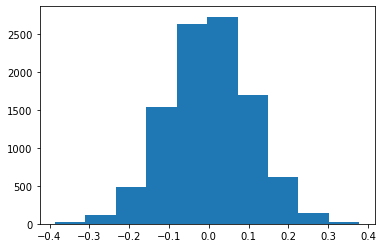

In [257]:
histo = plt.hist(difference)

In [259]:
obs_difference = np.mean(Neg_Total_odds_df['Pos_Neg']) - np.mean(Pos_Total_odds_df['Pos_Neg'])
obs_difference

0.26050420168067245

In [260]:
obs_difference = abs(obs_difference)

In [261]:
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i] >= obs_difference):
        positiveExtremes.append(difference[i])
    elif (difference[i] <= -obs_difference):
        negativeExtremes.append(difference[i])

print(len(positiveExtremes))
print(len(negativeExtremes))

52
66
